## Splitting data to csv

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTEN
from sklearn import metrics
%run ultil.py
import ultil


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Columns: 110 entries, Unnamed: 0 to F_FA
dtypes: float64(19), int64(90), object(1)
memory usage: 174.6+ KB


In [4]:
# Choosing the right features
columns_a = ['A','FA2', 'FA3', 'AD1', 'AD4', 'AD5', 'AD6', 'AD7', 'ECO2', 'ECO3', 'ECO5', 'SO1', 'SO2', 'SO3', 'SO4', 'SO5', 'SO6', 'SO7', 'SO8', 'STU1', 'STU4', 'STU5', 'DEV1', 'DEV2', 'DEV4', 'DEV5', 'TT1']
columns_d = ['D','FA2', 'FA3', 'AD3', 'AD4', 'AD5', 'AD6', 'AD7', 'ECO2', 'ECO3', 'ECO5', 'SO3', 'SO4', 'SO5', 'SO6', 'SO7', 'SO8', 'STU1', 'STU6', 'DEV1', 'DEV2', 'DEV3', 'DEV4', 'DEV5', 'TT1']
columns_s = ['S','FA2', 'FA3', 'FA4', 'FA5', 'FA6', 'AD1', 'AD3', 'AD4', 'AD5', 'AD6', 'AD7', 'ECO1', 'ECO2', 'ECO3', 'ECO5','SO1', 'SO2', 'SO3', 'SO4', 'SO5', 'SO6', 'SO7','SO8', 'STU1', 'STU2', 'STU3', 'STU4', 'STU5', 'STU6', 'DEV1', 'DEV2', 'DEV3', 'DEV4', 'DEV5', 'TT1']

res = list(set(columns_a + columns_d + columns_s)) 
res.sort()

df = df[res]

In [5]:
print(res)

['A', 'AD1', 'AD3', 'AD4', 'AD5', 'AD6', 'AD7', 'D', 'DEV1', 'DEV2', 'DEV3', 'DEV4', 'DEV5', 'ECO1', 'ECO2', 'ECO3', 'ECO5', 'FA2', 'FA3', 'FA4', 'FA5', 'FA6', 'S', 'SO1', 'SO2', 'SO3', 'SO4', 'SO5', 'SO6', 'SO7', 'SO8', 'STU1', 'STU2', 'STU3', 'STU4', 'STU5', 'STU6', 'TT1']


In [6]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [7]:
df = df.replace('',np.nan, regex=True)

In [8]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [9]:
df.isna().sum()

A       0
AD1     0
AD3     0
AD4     0
AD5     0
AD6     0
AD7     0
D       0
DEV1    0
DEV2    0
DEV3    0
DEV4    0
DEV5    0
ECO1    0
ECO2    0
ECO3    0
ECO5    0
FA2     0
FA3     0
FA4     0
FA5     0
FA6     0
S       0
SO1     0
SO2     0
SO3     0
SO4     0
SO5     0
SO6     0
SO7     0
SO8     0
STU1    0
STU2    0
STU3    0
STU4    0
STU5    0
STU6    0
TT1     0
dtype: int64

In [10]:
def clean(df_input):
    for col in df_input.columns :
        if df_input[col].dtypes == "float64":
            df_input[col] = df_input[col].astype('int')
    return df_input

In [11]:
df = clean(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       203 non-null    int64
 1   AD1     203 non-null    int64
 2   AD3     203 non-null    int64
 3   AD4     203 non-null    int64
 4   AD5     203 non-null    int64
 5   AD6     203 non-null    int64
 6   AD7     203 non-null    int64
 7   D       203 non-null    int64
 8   DEV1    203 non-null    int64
 9   DEV2    203 non-null    int64
 10  DEV3    203 non-null    int64
 11  DEV4    203 non-null    int64
 12  DEV5    203 non-null    int64
 13  ECO1    203 non-null    int64
 14  ECO2    203 non-null    int64
 15  ECO3    203 non-null    int64
 16  ECO5    203 non-null    int64
 17  FA2     203 non-null    int64
 18  FA3     203 non-null    int64
 19  FA4     203 non-null    int64
 20  FA5     203 non-null    int64
 21  FA6     203 non-null    int64
 22  S       203 non-null    int64
 23  SO1     203 non

## Basic statistics

In [13]:
df.describe()

,A,AD1,AD3,AD4,AD5,AD6,AD7,D,DEV1,DEV2,...,SO6,SO7,SO8,STU1,STU2,STU3,STU4,STU5,STU6,TT1
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,2.507389,2.788177,3.290640,3.546798,3.300493,3.310345,2.788177,2.541872,3.423645,3.704433,...,2.389163,2.886700,3.532020,3.379310,3.699507,3.635468,3.482759,2.743842,2.827586,3.330049
std,1.380090,0.974658,1.080549,0.985804,1.068611,1.042294,1.071438,1.375878,1.120393,1.160970,...,1.186258,1.072598,1.072939,1.043113,1.118410,1.078651,1.045238,1.157583,1.064656,1.162293
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,...,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000
50%,2.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,...,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.500000,3.500000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


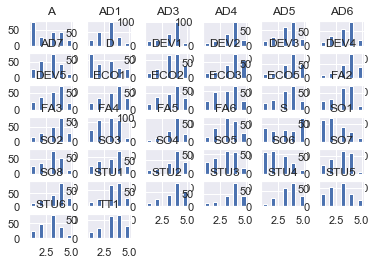

In [14]:
sns.set(rc={'figure.figsize':(15,15)})
df.hist()
plt.show()

In [15]:
res[37]

'TT1'

prev = 0, i = 4


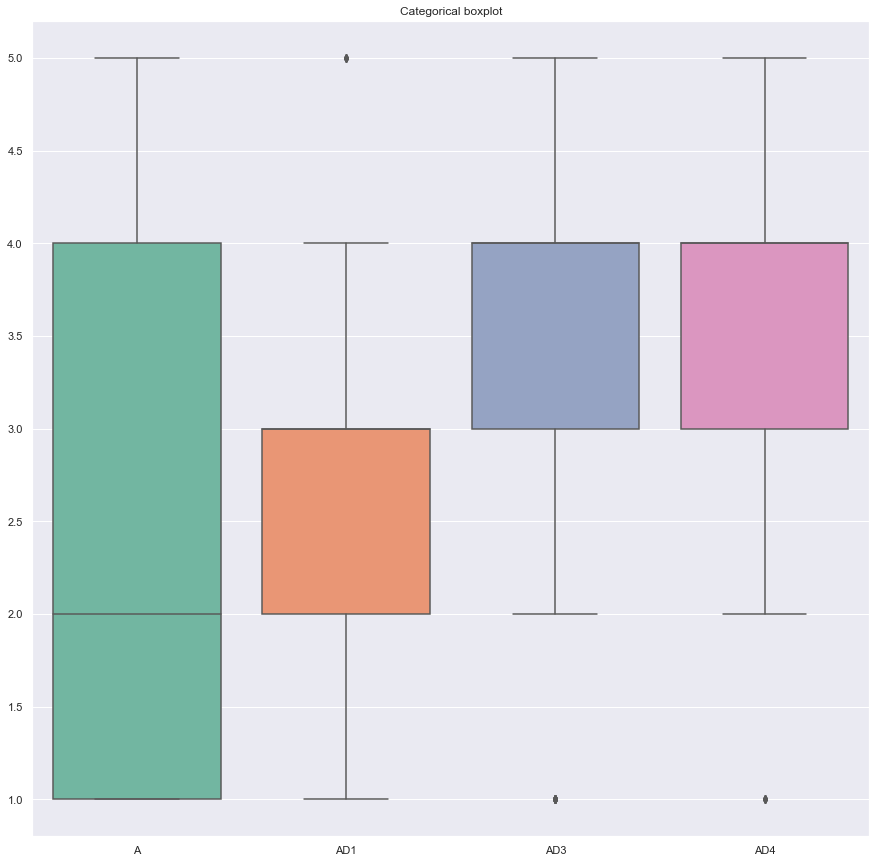

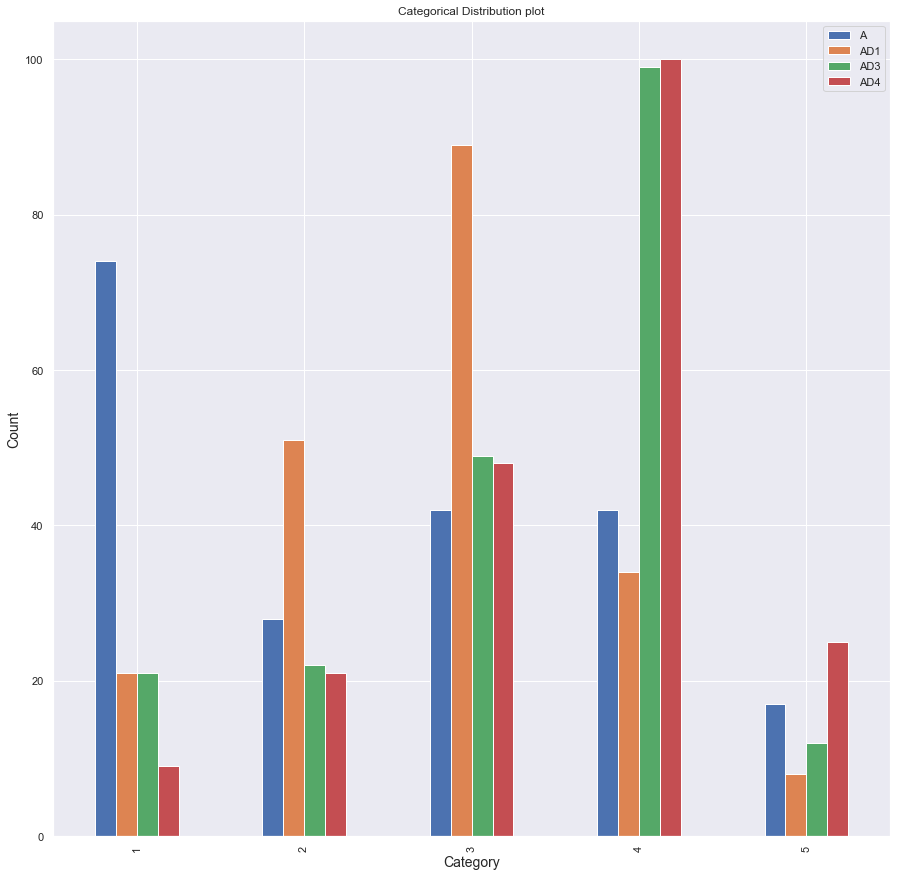

prev = 4, i = 8


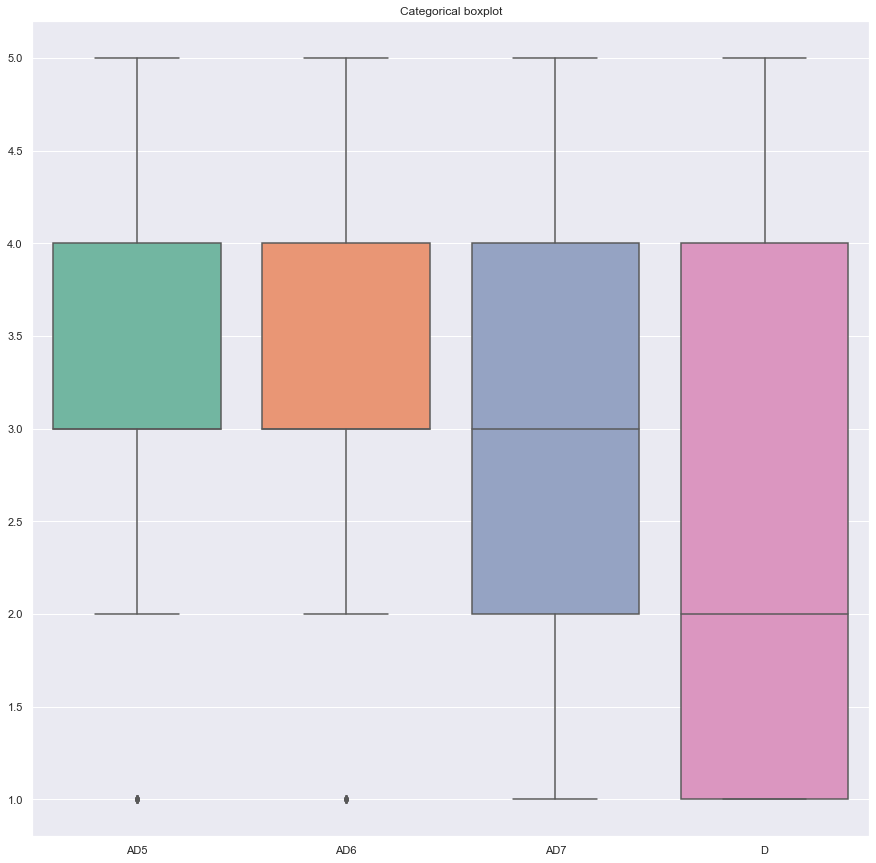

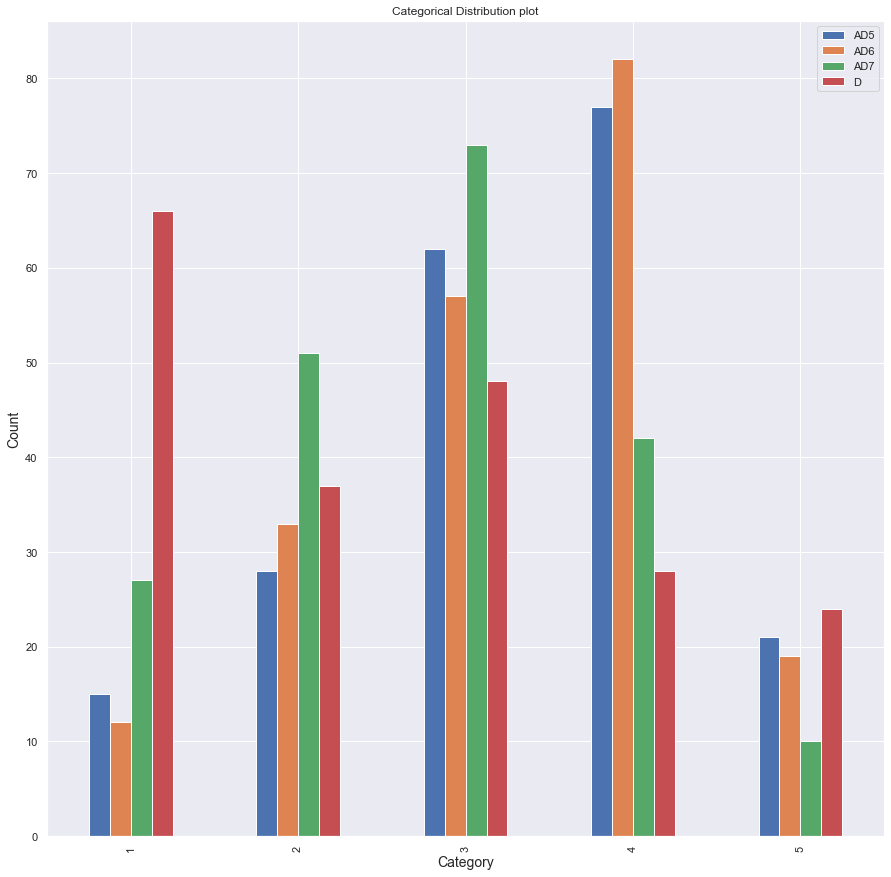

prev = 8, i = 12


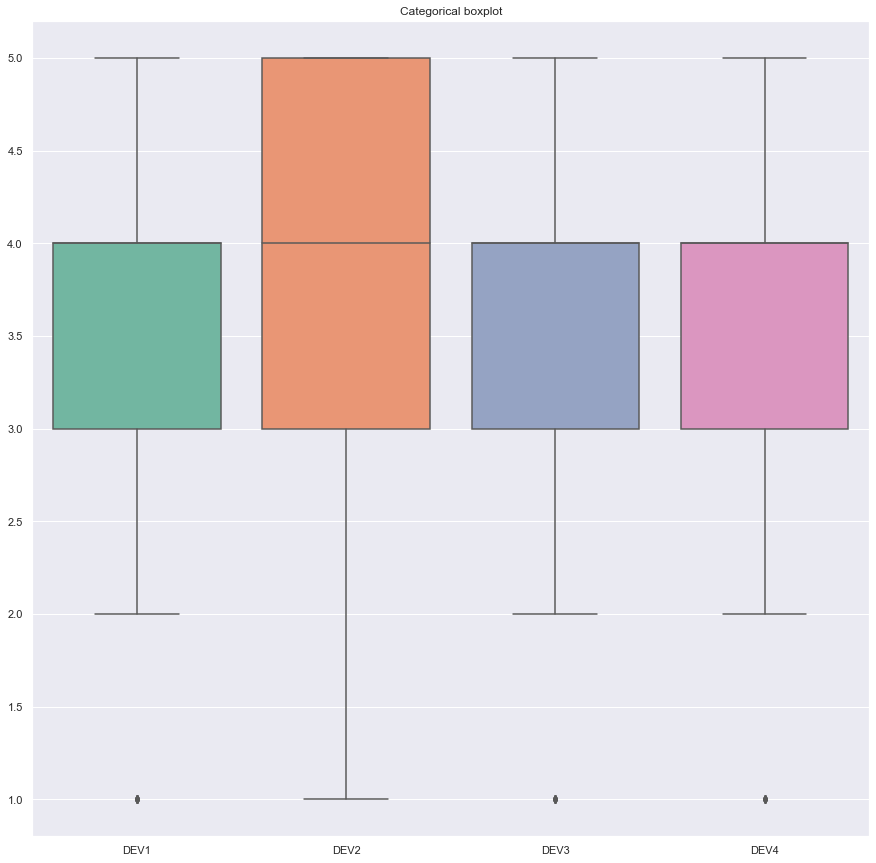

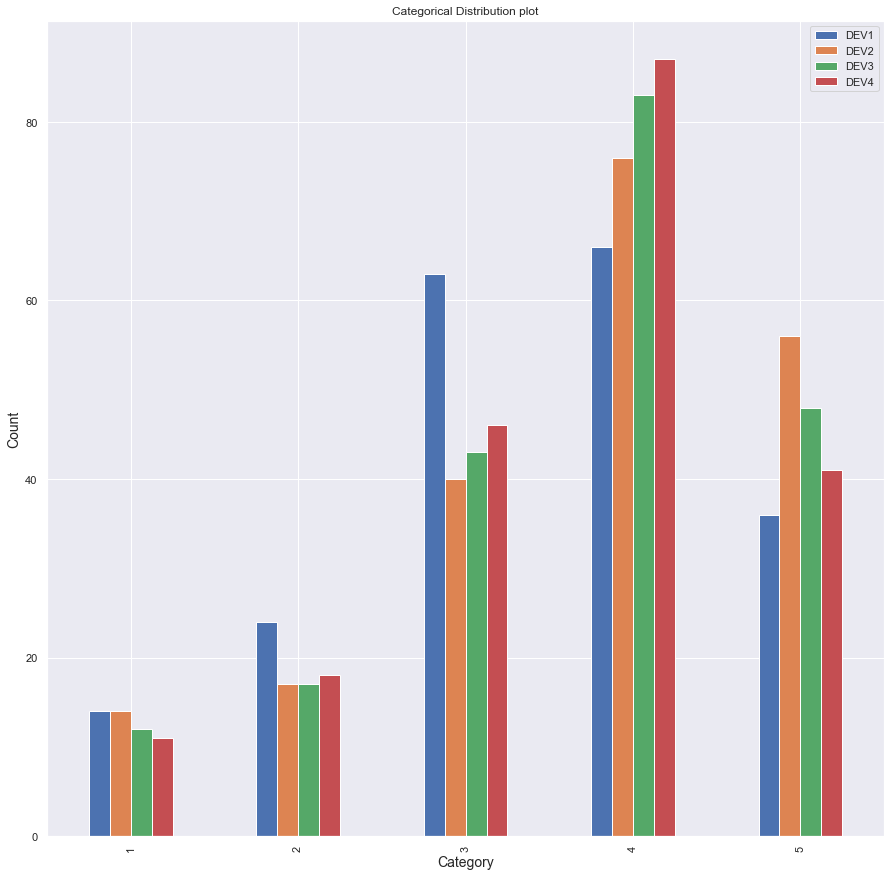

prev = 12, i = 16


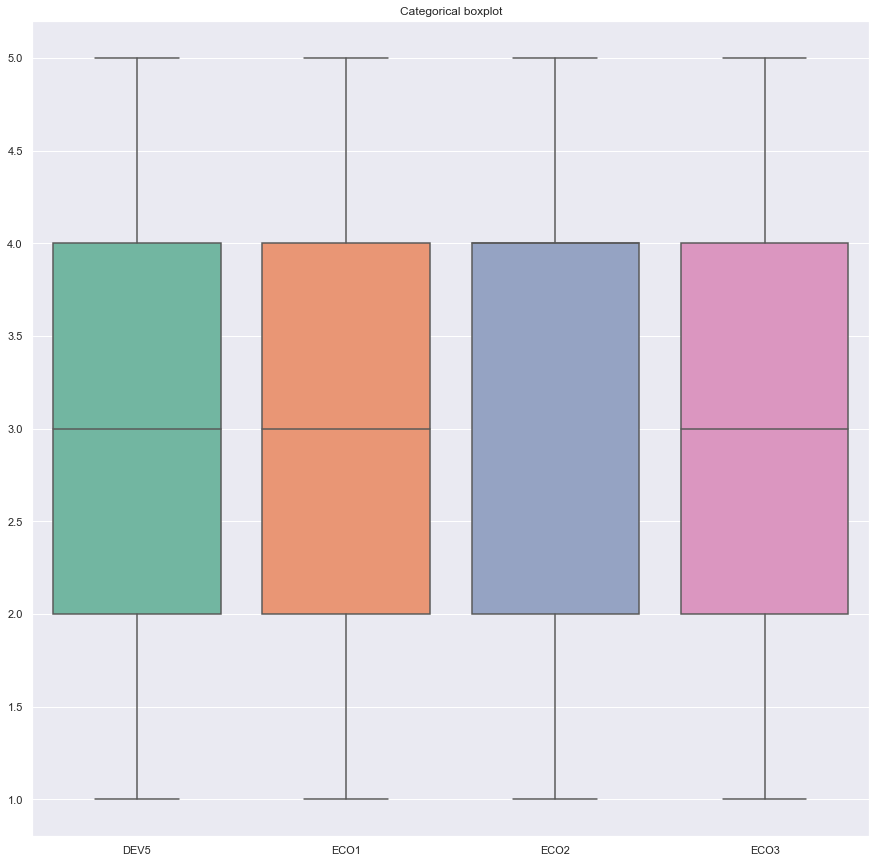

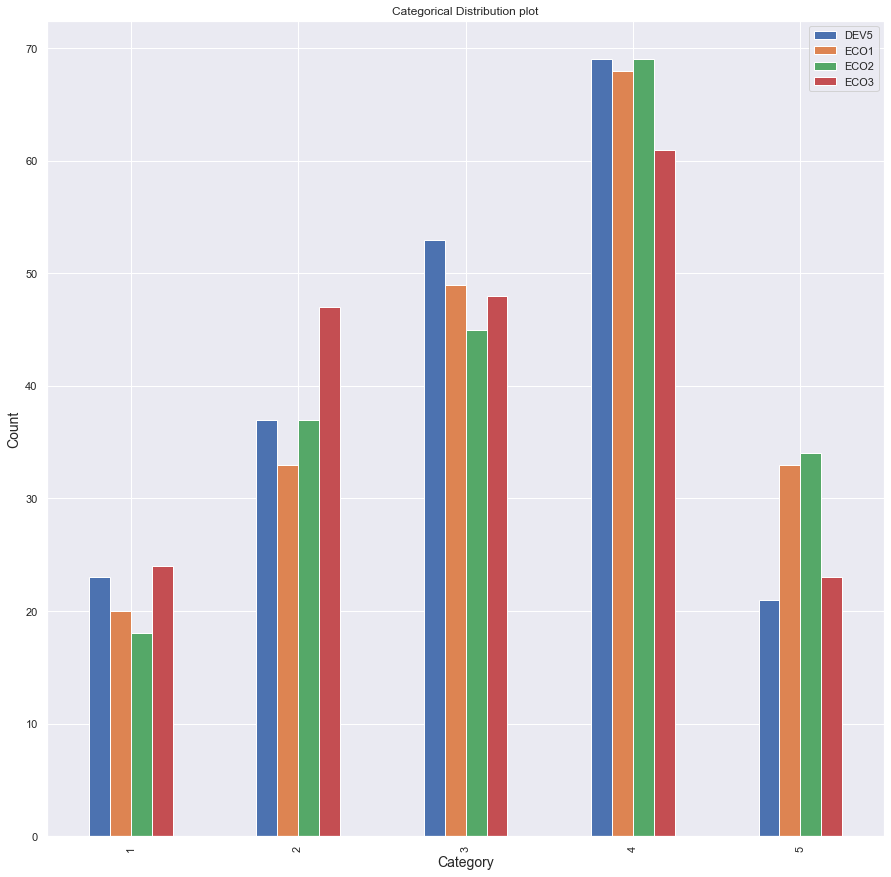

prev = 16, i = 20


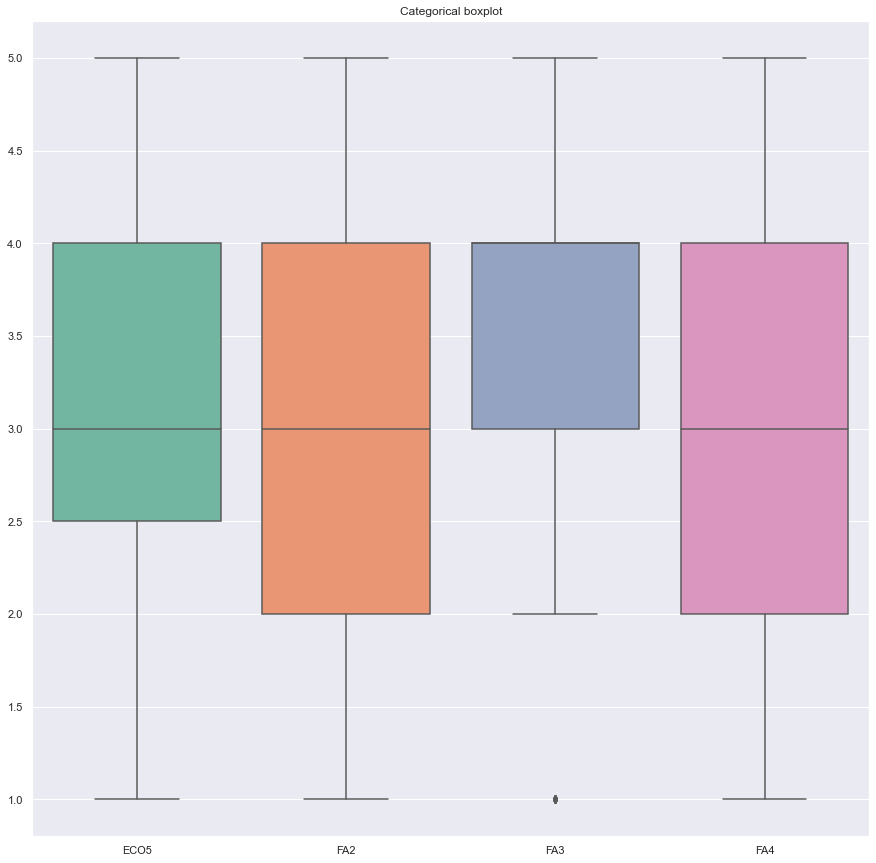

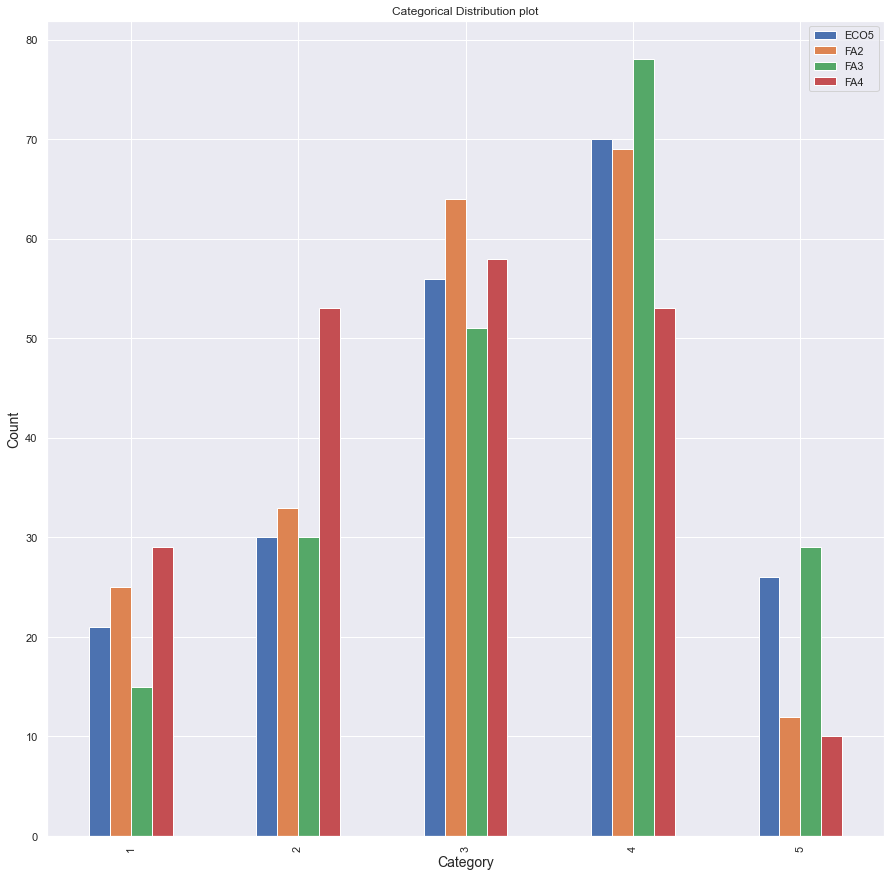

prev = 20, i = 24


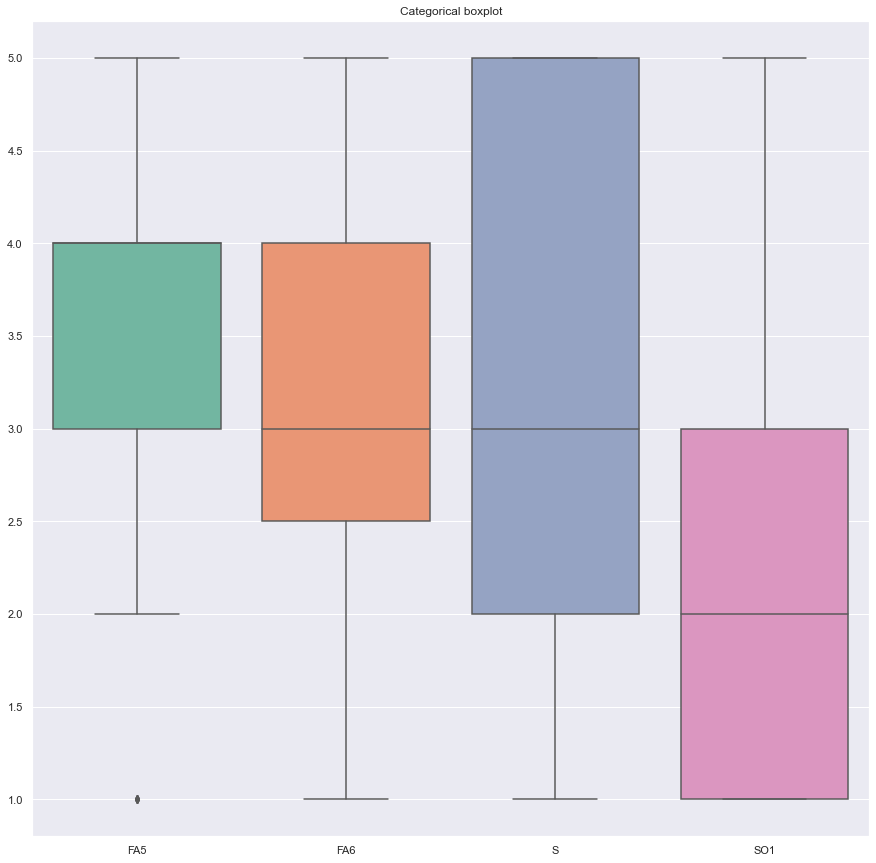

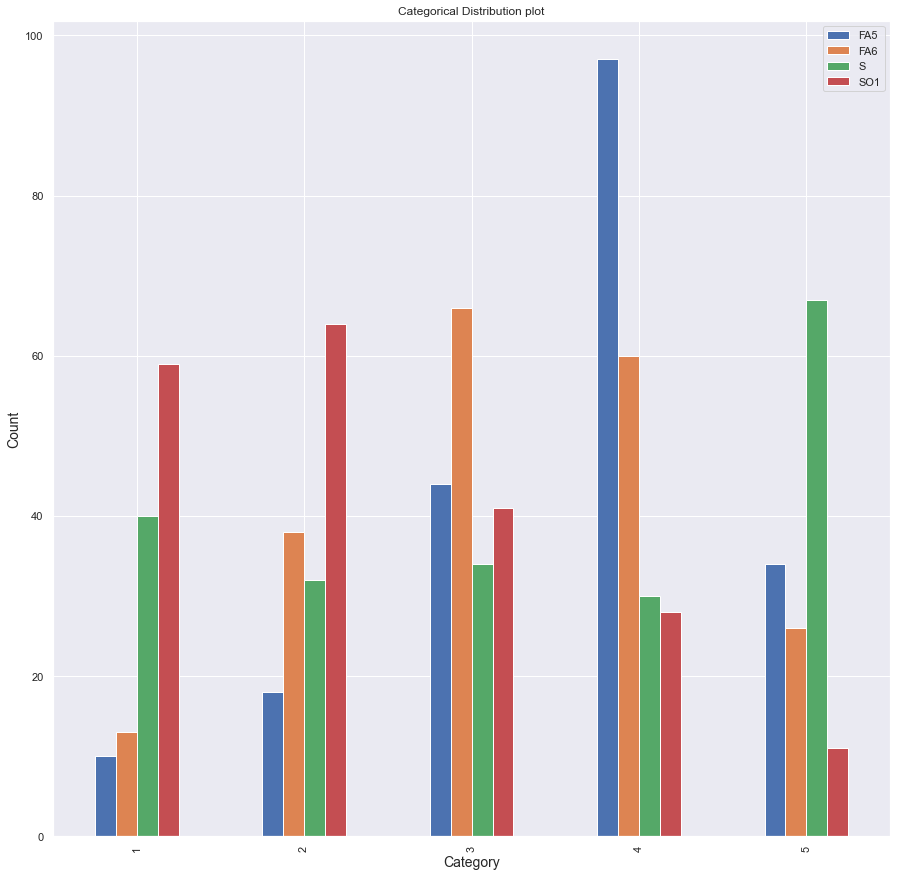

prev = 24, i = 28


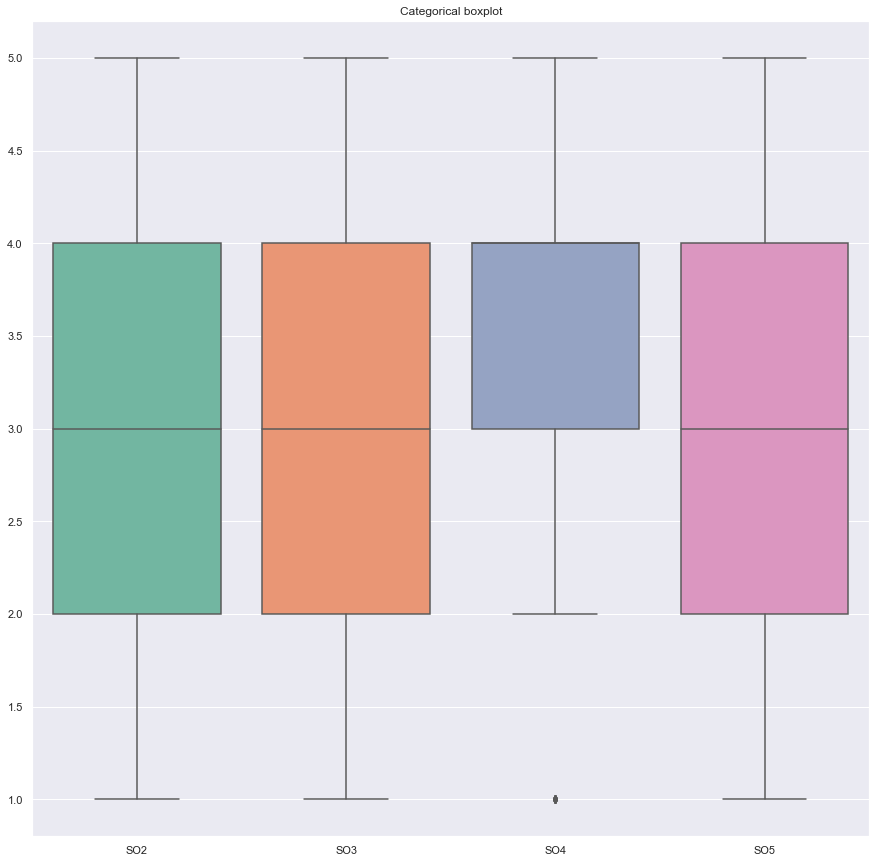

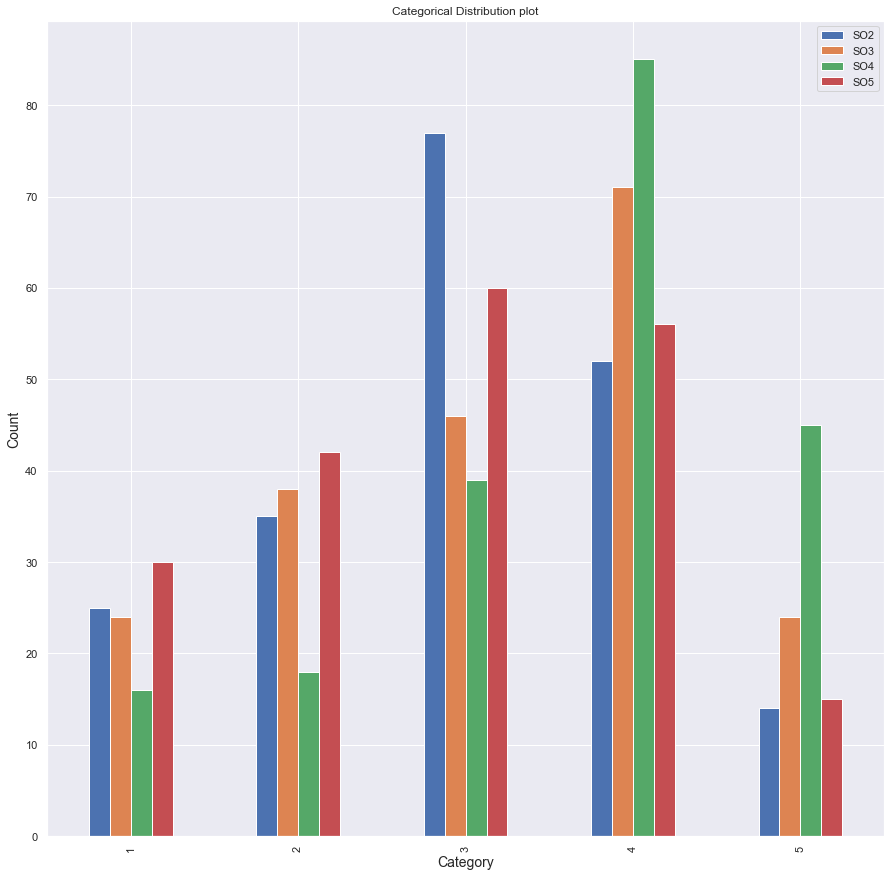

prev = 28, i = 32


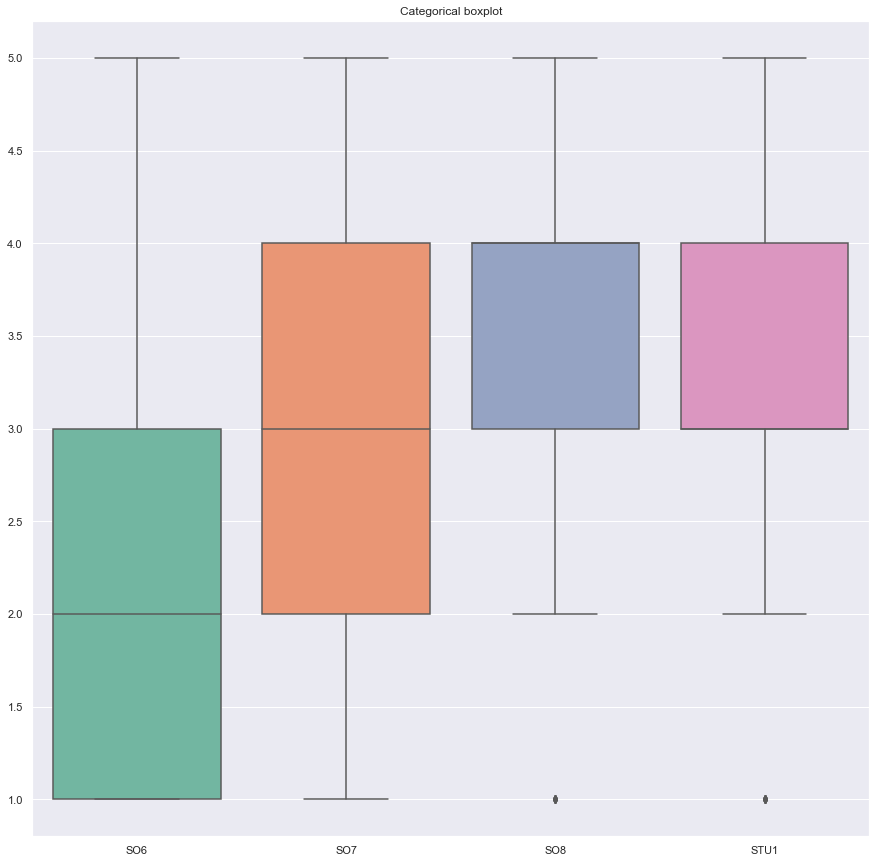

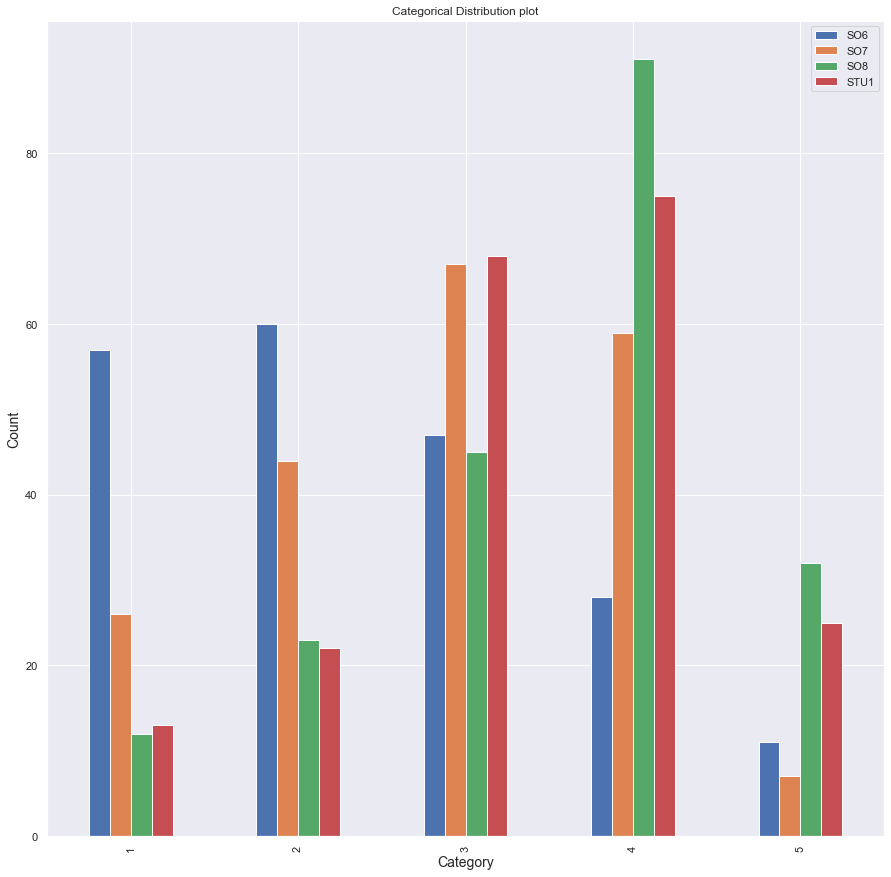

prev = 32, i = 36


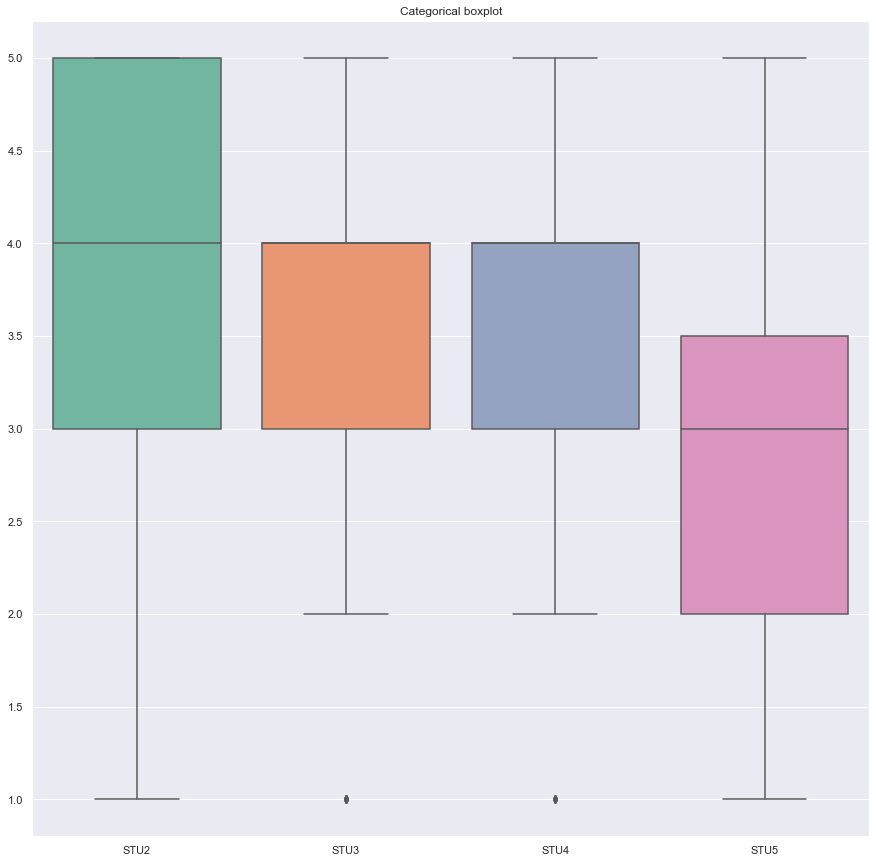

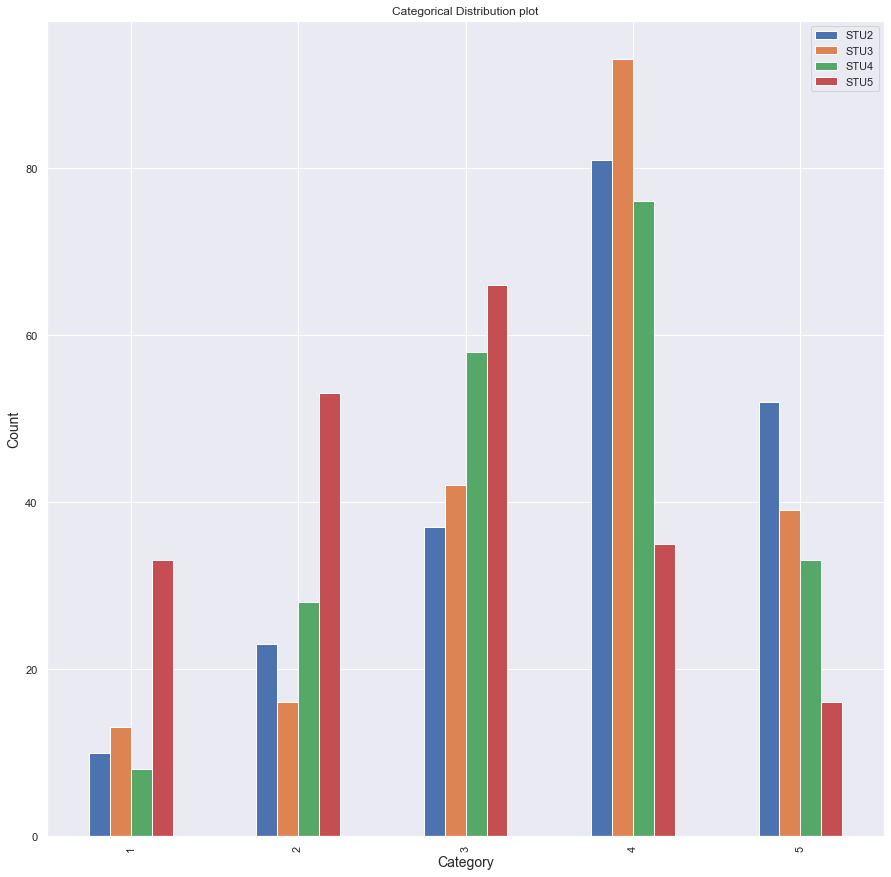

prev = 36, i = 40


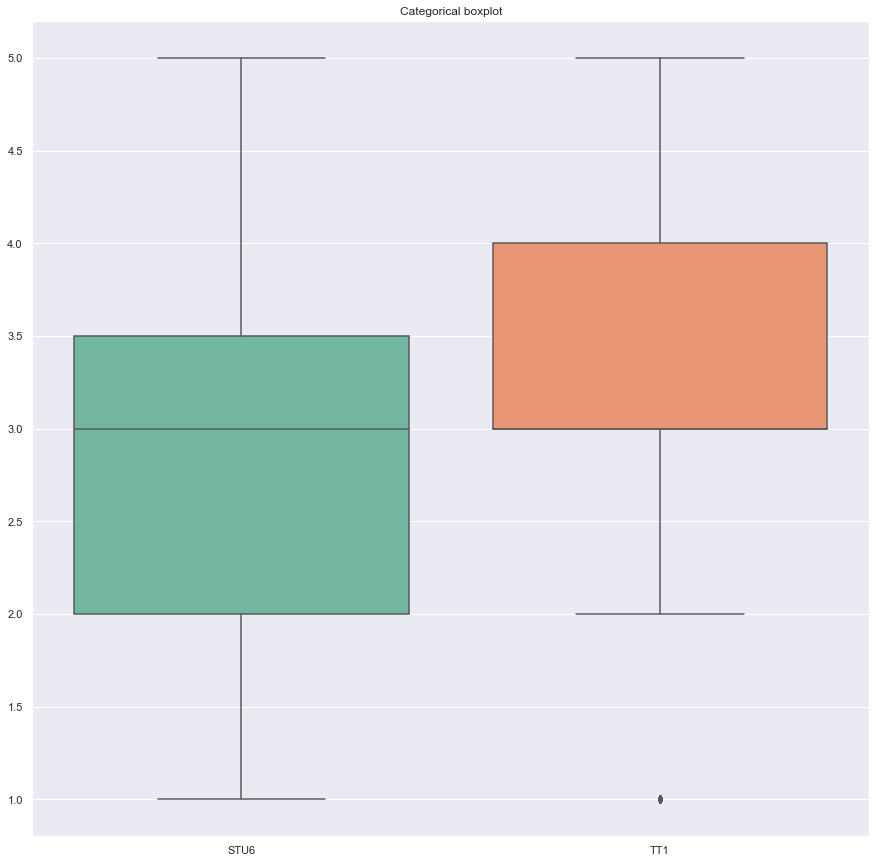

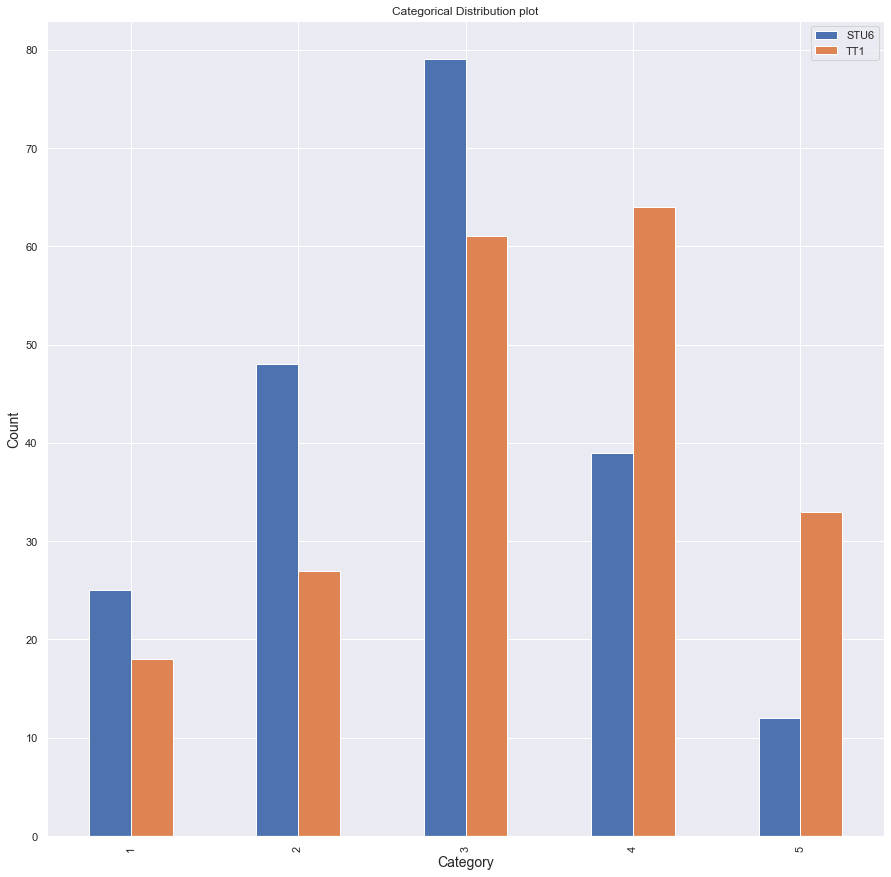

In [16]:
i = 0
prev = 0
while i < len(res):
    prev = i
    i +=4
    if(prev == 0):
        i = 4
    elif(prev == 35) :
        i = 37
    elif(i ==41):
        continue
    print("prev = %d, i = %d" % (prev, i))
    box_plot(res[prev:i],df)
    dis_plot(res[prev:i],df)

##### For `D`, `S` and `A`

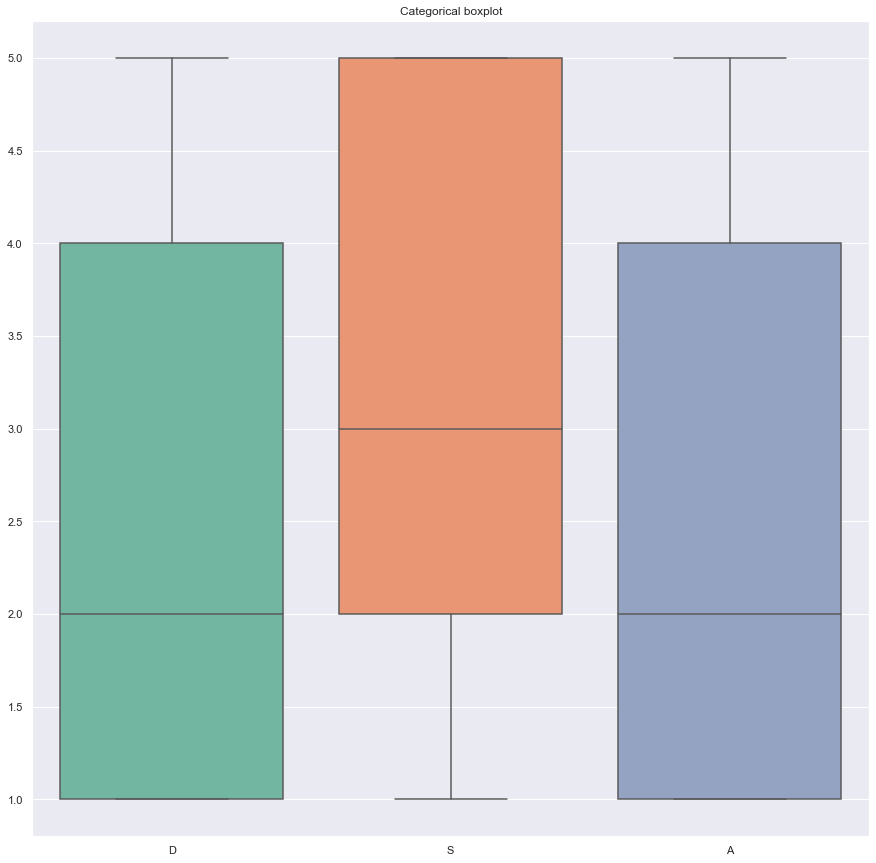

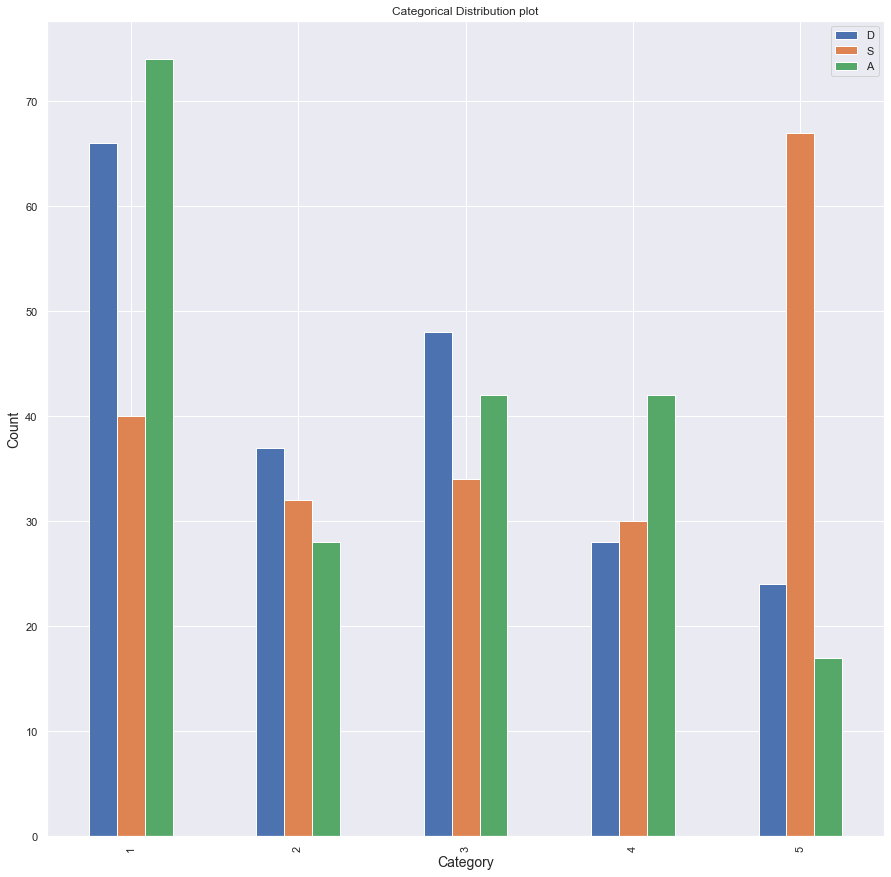

In [17]:
    box_plot(['D','S','A'],df)
    dis_plot(['D','S','A'],df)

## Feature selection for A ,D and S

In [18]:
#A
# columns = {'STU1','STU2','STU3','STU4','ECO1','ECO2','ECO3','ECO5','SO8','FA1','AD4','AD5','AD6','DEV5','TT1'}
df_new_a = df[columns_a]
df_new_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       203 non-null    int64
 1   FA2     203 non-null    int64
 2   FA3     203 non-null    int64
 3   AD1     203 non-null    int64
 4   AD4     203 non-null    int64
 5   AD5     203 non-null    int64
 6   AD6     203 non-null    int64
 7   AD7     203 non-null    int64
 8   ECO2    203 non-null    int64
 9   ECO3    203 non-null    int64
 10  ECO5    203 non-null    int64
 11  SO1     203 non-null    int64
 12  SO2     203 non-null    int64
 13  SO3     203 non-null    int64
 14  SO4     203 non-null    int64
 15  SO5     203 non-null    int64
 16  SO6     203 non-null    int64
 17  SO7     203 non-null    int64
 18  SO8     203 non-null    int64
 19  STU1    203 non-null    int64
 20  STU4    203 non-null    int64
 21  STU5    203 non-null    int64
 22  DEV1    203 non-null    int64
 23  DEV2    203 non

In [19]:
# #D
df_new_d = df[columns_d]
df_new_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       203 non-null    int64
 1   FA2     203 non-null    int64
 2   FA3     203 non-null    int64
 3   AD1     203 non-null    int64
 4   AD4     203 non-null    int64
 5   AD5     203 non-null    int64
 6   AD6     203 non-null    int64
 7   AD7     203 non-null    int64
 8   ECO2    203 non-null    int64
 9   ECO3    203 non-null    int64
 10  ECO5    203 non-null    int64
 11  SO1     203 non-null    int64
 12  SO2     203 non-null    int64
 13  SO3     203 non-null    int64
 14  SO4     203 non-null    int64
 15  SO5     203 non-null    int64
 16  SO6     203 non-null    int64
 17  SO7     203 non-null    int64
 18  SO8     203 non-null    int64
 19  STU1    203 non-null    int64
 20  STU4    203 non-null    int64
 21  STU5    203 non-null    int64
 22  DEV1    203 non-null    int64
 23  DEV2    203 non

In [20]:
# #S
df_new_s = df[columns_s]
df_new_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S       203 non-null    int64
 1   FA2     203 non-null    int64
 2   FA3     203 non-null    int64
 3   FA4     203 non-null    int64
 4   FA5     203 non-null    int64
 5   FA6     203 non-null    int64
 6   AD1     203 non-null    int64
 7   AD3     203 non-null    int64
 8   AD4     203 non-null    int64
 9   AD5     203 non-null    int64
 10  AD6     203 non-null    int64
 11  AD7     203 non-null    int64
 12  ECO1    203 non-null    int64
 13  ECO2    203 non-null    int64
 14  ECO3    203 non-null    int64
 15  ECO5    203 non-null    int64
 16  SO1     203 non-null    int64
 17  SO2     203 non-null    int64
 18  SO3     203 non-null    int64
 19  SO4     203 non-null    int64
 20  SO5     203 non-null    int64
 21  SO6     203 non-null    int64
 22  SO7     203 non-null    int64
 23  SO8     203 non

### Feature selection

In [21]:
#A
X_df_A, y_df_A = featureSelection(df_new_a, 'A')
# #D
X_df_D, y_df_D = featureSelection(df_new_d, 'D')
#S
X_df_S, y_df_S = featureSelection(df_new_s, 'S')

In [22]:
X_df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   FA2     203 non-null    int64
 1   FA3     203 non-null    int64
 2   AD1     203 non-null    int64
 3   AD4     203 non-null    int64
 4   AD5     203 non-null    int64
 5   AD6     203 non-null    int64
 6   AD7     203 non-null    int64
 7   ECO2    203 non-null    int64
 8   ECO3    203 non-null    int64
 9   ECO5    203 non-null    int64
 10  SO1     203 non-null    int64
 11  SO2     203 non-null    int64
 12  SO3     203 non-null    int64
 13  SO4     203 non-null    int64
 14  SO5     203 non-null    int64
 15  SO6     203 non-null    int64
 16  SO7     203 non-null    int64
 17  SO8     203 non-null    int64
 18  STU1    203 non-null    int64
 19  STU4    203 non-null    int64
 20  STU5    203 non-null    int64
 21  DEV1    203 non-null    int64
 22  DEV2    203 non-null    int64
 23  DEV4    203 non

## Rebalancing 

Class=3, n=74 (20.000%)
Class=1, n=74 (20.000%)
Class=2, n=74 (20.000%)
Class=4, n=74 (20.000%)
Class=5, n=74 (20.000%)


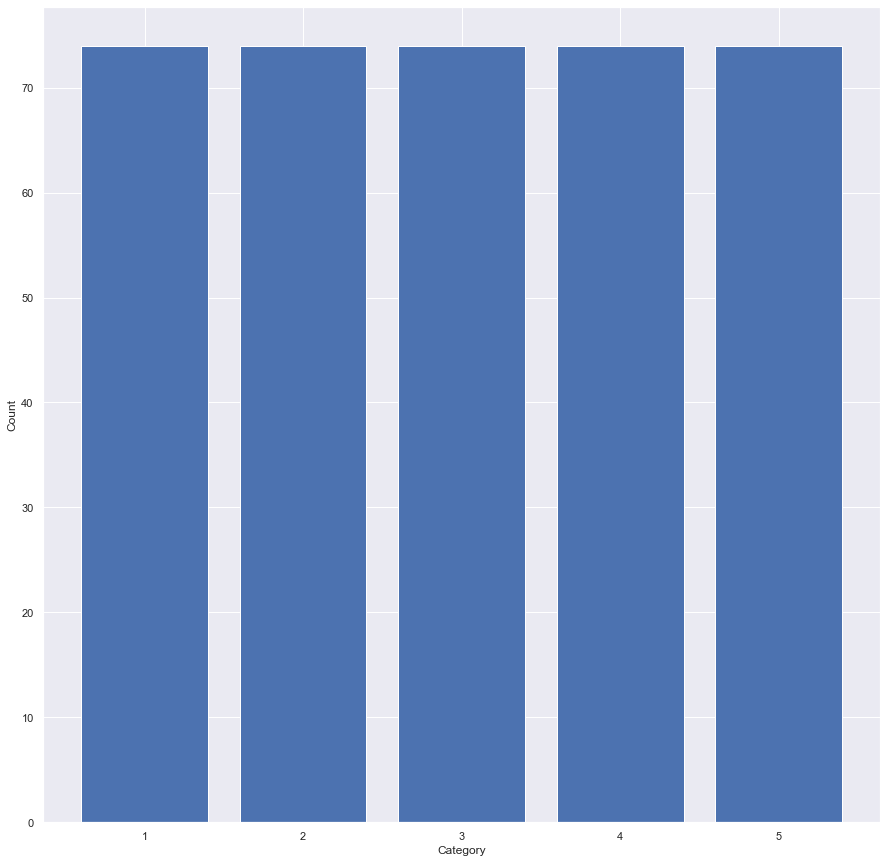

Class=5, n=66 (20.000%)
Class=1, n=66 (20.000%)
Class=2, n=66 (20.000%)
Class=3, n=66 (20.000%)
Class=4, n=66 (20.000%)


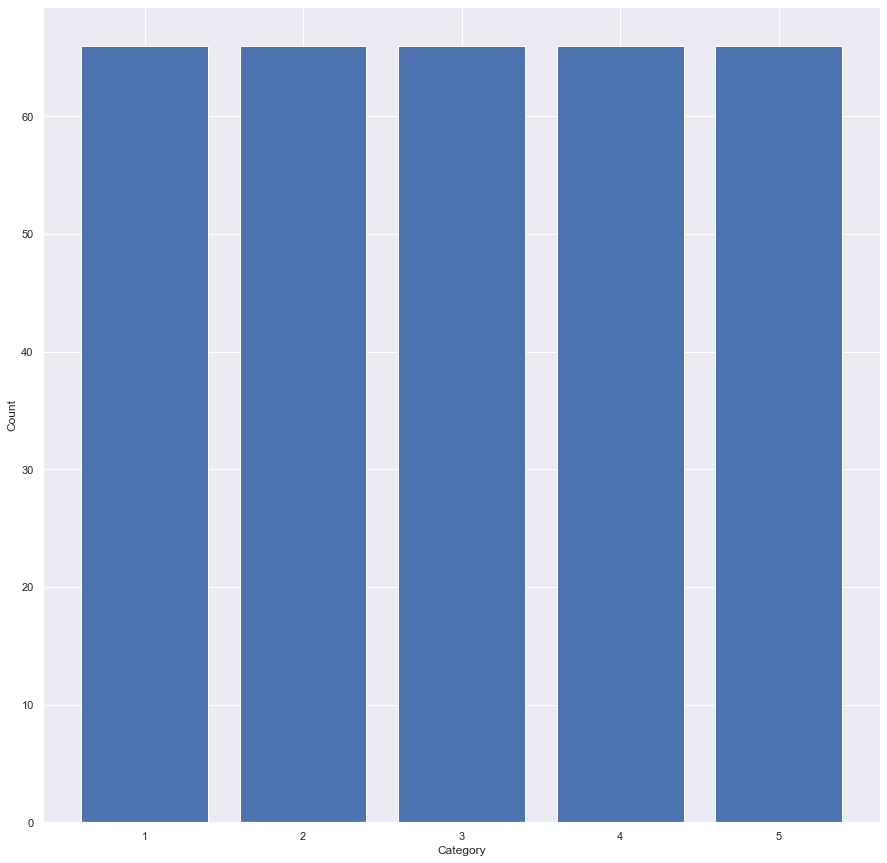

Class=5, n=67 (20.000%)
Class=2, n=67 (20.000%)
Class=1, n=67 (20.000%)
Class=4, n=67 (20.000%)
Class=3, n=67 (20.000%)


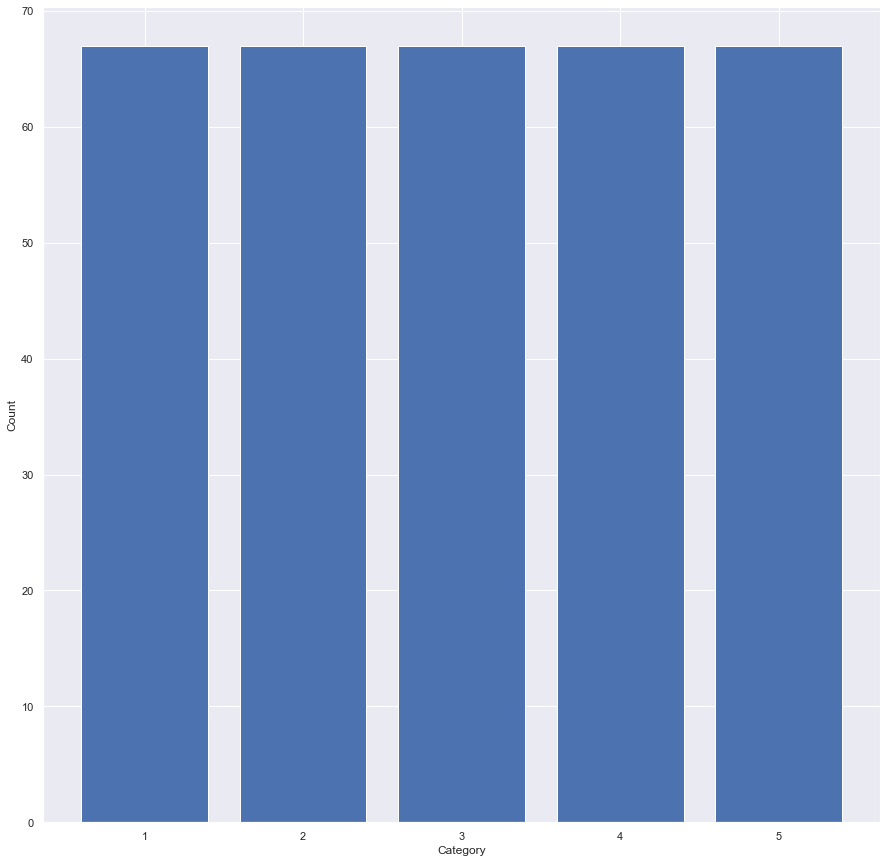

In [23]:
X_res_a, y_res_a = rebalancing(X_df_A,y_df_A)
X_res_d, y_res_d = rebalancing(X_df_D,y_df_D)
X_res_s, y_res_s = rebalancing(X_df_S,y_df_S)

## Splitting data

In [24]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_res_a, y_res_a ,test_size = .2, random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_res_s, y_res_s, test_size = .2, random_state=42)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_res_d, y_res_d, test_size = .2, random_state=42)

### Model Construction and comparison

Reference : Learning the Mental Health Impact of COVID-19 in the United States with Explainable Artificial Intelligence (medrxiv.org)
<br>
https://doi.org/10.1371/journal.pone.0230389.t004

### KNN

              precision    recall  f1-score   support

           1       0.33      0.27      0.30        11
           2       0.55      0.69      0.61        16
           3       0.64      0.53      0.58        17
           4       0.67      0.59      0.62        17
           5       0.62      0.77      0.69        13

    accuracy                           0.58        74
   macro avg       0.56      0.57      0.56        74
weighted avg       0.58      0.58      0.57        74



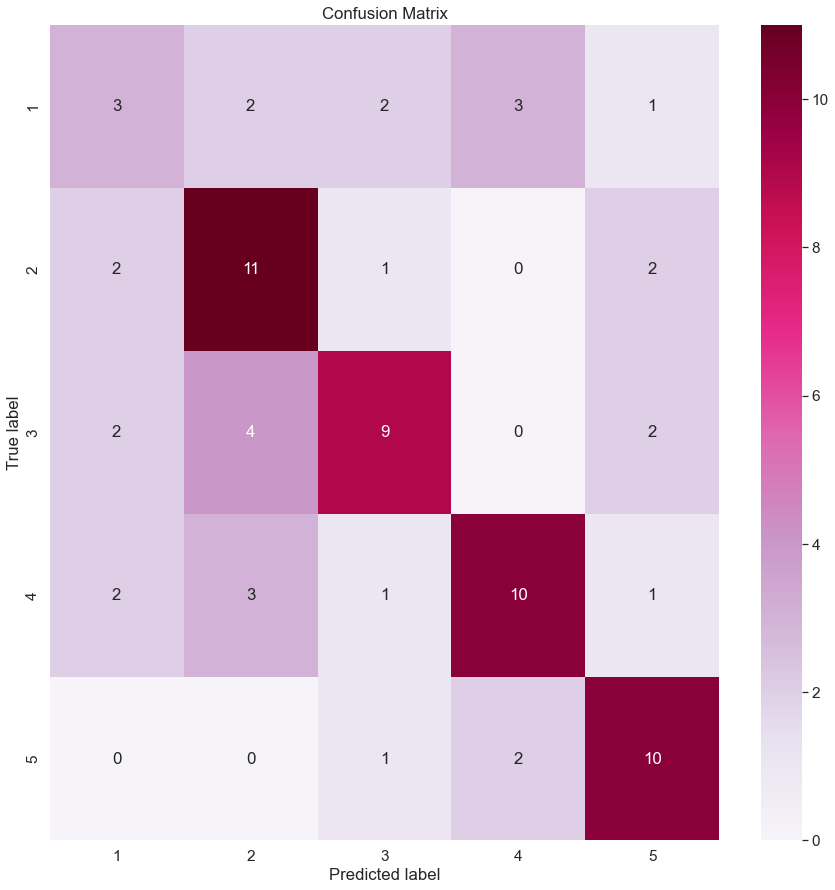

,1,2,3,4,5
1,3,2,2,3,1
2,2,11,1,0,2
3,2,4,9,0,2
4,2,3,1,10,1
5,0,0,1,2,10


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
model_knn = KNeighborsClassifier()
#Train the model using the training sets
model_knn.fit(X_train_a, y_train_a)
pred_knn_a = model_knn.predict(X_test_a)
print(classification_report(y_test_a, pred_knn_a))
plot_confusion(y_test_a, pred_knn_a)

### For variable `S`

              precision    recall  f1-score   support

           1       0.67      0.75      0.71         8
           2       0.35      0.78      0.48         9
           3       0.44      0.73      0.55        11
           4       0.78      0.74      0.76        19
           5       1.00      0.10      0.18        20

    accuracy                           0.55        67
   macro avg       0.65      0.62      0.54        67
weighted avg       0.72      0.55      0.51        67



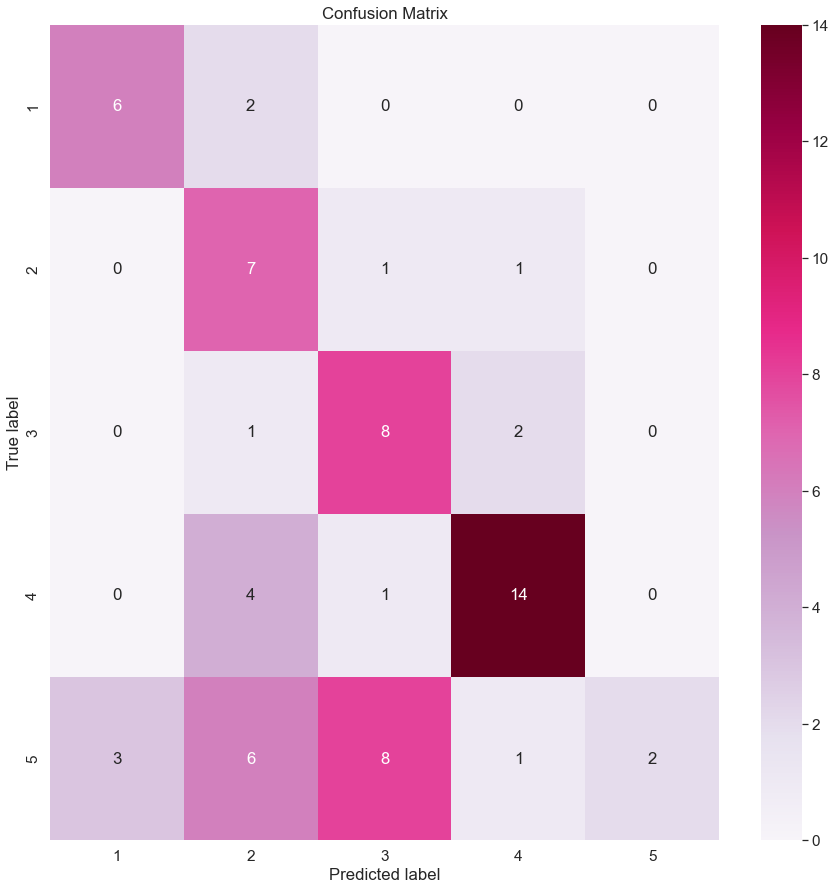

,1,2,3,4,5
1,6,2,0,0,0
2,0,7,1,1,0
3,0,1,8,2,0
4,0,4,1,14,0
5,3,6,8,1,2


In [32]:
model_knn = KNeighborsClassifier()
#Train the model using the training sets
model_knn.fit(X_train_s, y_train_s)
pred_knn_s = model_knn.predict(X_test_s)
print(classification_report(y_test_s, pred_knn_s))
plot_confusion(y_test_s, pred_knn_s)

              precision    recall  f1-score   support

           1       0.80      0.36      0.50        11
           2       0.33      0.33      0.33        12
           3       0.27      0.78      0.40         9
           4       0.83      0.33      0.48        15
           5       0.94      0.84      0.89        19

    accuracy                           0.55        66
   macro avg       0.64      0.53      0.52        66
weighted avg       0.69      0.55      0.56        66



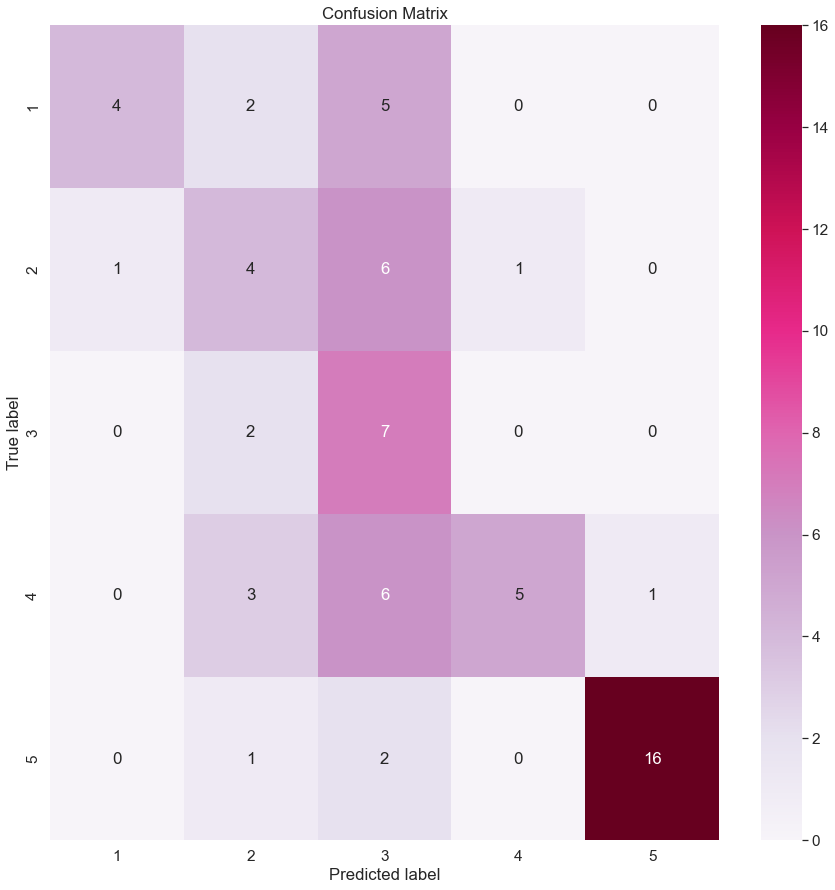

,1,2,3,4,5
1,4,2,5,0,0
2,1,4,6,1,0
3,0,2,7,0,0
4,0,3,6,5,1
5,0,1,2,0,16


In [33]:
model_knn = KNeighborsClassifier()
#Train the model using the training sets
model_knn.fit(X_train_d, y_train_d)
pred_knn_d = model_knn.predict(X_test_d)
print(classification_report(y_test_d, pred_knn_d))
plot_confusion(y_test_d, pred_knn_d)

## Logistic Regression

### For variable `A`

              precision    recall  f1-score   support

           1       0.40      0.36      0.38        11
           2       0.70      0.44      0.54        16
           3       0.50      0.47      0.48        17
           4       0.50      0.59      0.54        17
           5       0.50      0.69      0.58        13

    accuracy                           0.51        74
   macro avg       0.52      0.51      0.51        74
weighted avg       0.53      0.51      0.51        74



/Users/nhatbuiminh/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


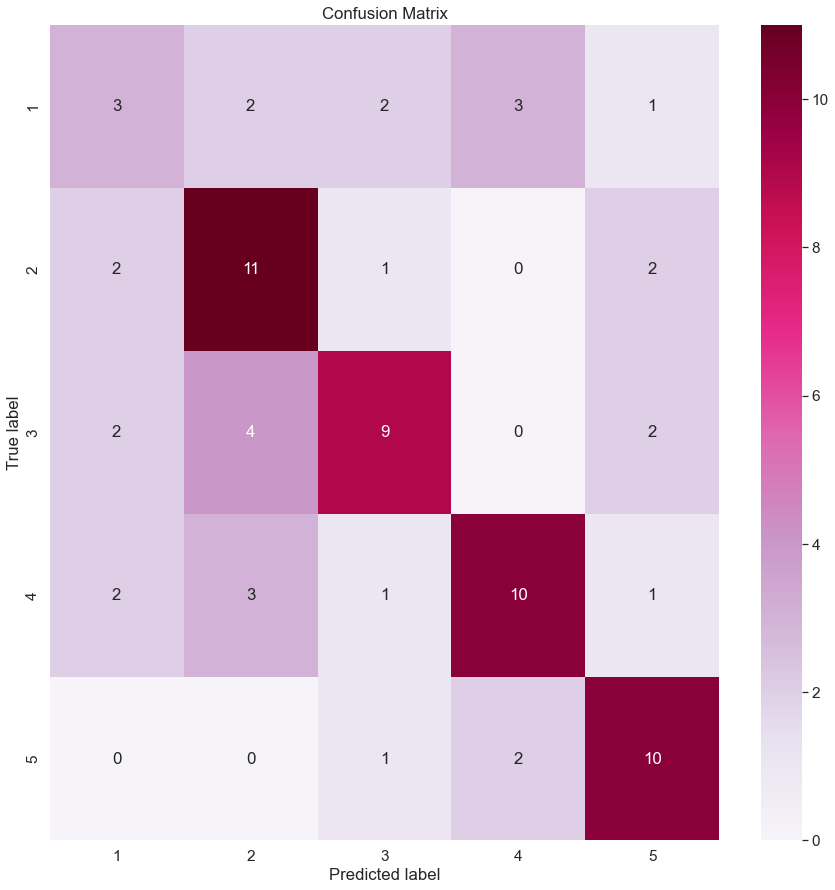

,1,2,3,4,5
1,3,2,2,3,1
2,2,11,1,0,2
3,2,4,9,0,2
4,2,3,1,10,1
5,0,0,1,2,10


In [34]:
from sklearn.linear_model import LogisticRegression
clf = clf =LogisticRegression(random_state=0, class_weight='balanced').fit(X_train_a, y_train_a)
#Fit the data
pred_logistic_a = clf.predict(X_test_a)
print(classification_report(y_test_a, pred_logistic_a))
plot_confusion(y_test_a, pred_knn_a)

### For variable `D`

/Users/nhatbuiminh/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.23      0.27      0.25        11
           2       0.50      0.25      0.33        12
           3       0.20      0.22      0.21         9
           4       0.73      0.73      0.73        15
           5       0.73      0.84      0.78        19

    accuracy                           0.53        66
   macro avg       0.48      0.46      0.46        66
weighted avg       0.53      0.53      0.52        66



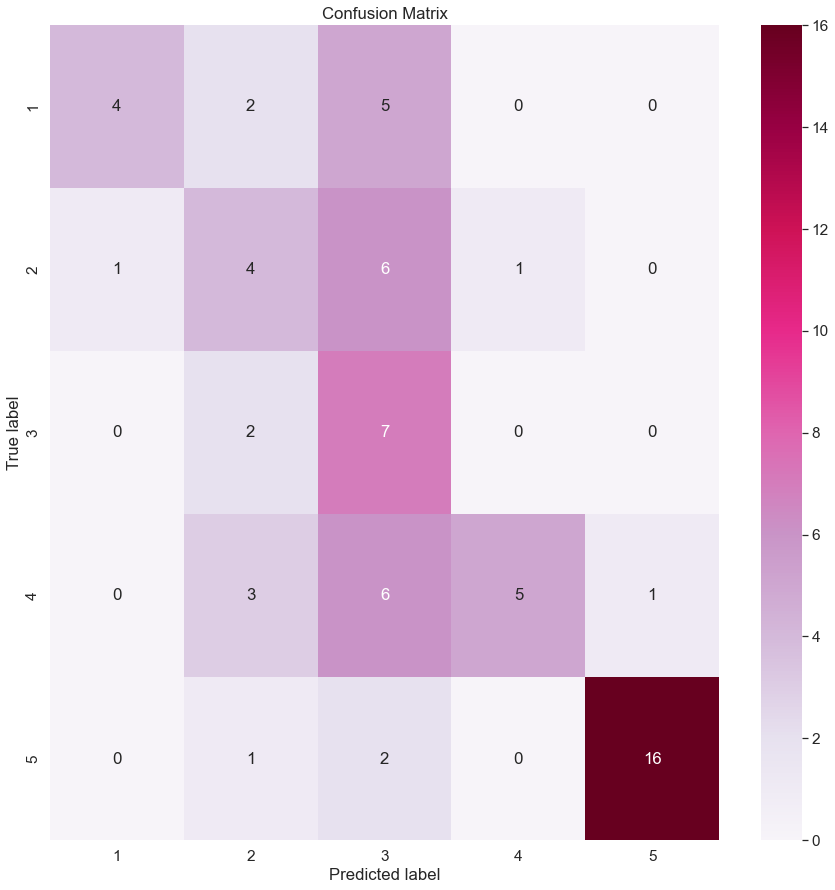

,1,2,3,4,5
1,4,2,5,0,0
2,1,4,6,1,0
3,0,2,7,0,0
4,0,3,6,5,1
5,0,1,2,0,16


In [35]:
clf = clf =LogisticRegression(random_state=0, class_weight='balanced').fit(X_train_d, y_train_d)
#Fit the data
pred_logistic_d = clf.predict(X_test_d)
print(classification_report(y_test_d, pred_logistic_d))
plot_confusion(y_test_d, pred_knn_d)

### For variable `S`

In [36]:
clf = clf =LogisticRegression(random_state=0, class_weight='balanced').fit(X_train_s, y_train_s)
#Fit the data
pred_logistic_s = clf.predict(X_test_s)
print(classification_report(y_test_s, pred_logistic_s))

              precision    recall  f1-score   support

           1       0.33      0.50      0.40         8
           2       0.55      0.67      0.60         9
           3       0.40      0.36      0.38        11
           4       0.64      0.74      0.68        19
           5       0.50      0.30      0.37        20

    accuracy                           0.51        67
   macro avg       0.48      0.51      0.49        67
weighted avg       0.51      0.51      0.50        67



/Users/nhatbuiminh/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 ### SVM

In [37]:
from sklearn.svm import SVC
model_svm= SVC()

### For variable `A`

              precision    recall  f1-score   support

           1       0.47      0.64      0.54        11
           2       0.67      0.62      0.65        16
           3       0.69      0.53      0.60        17
           4       0.62      0.76      0.68        17
           5       1.00      0.77      0.87        13

    accuracy                           0.66        74
   macro avg       0.69      0.66      0.67        74
weighted avg       0.69      0.66      0.67        74



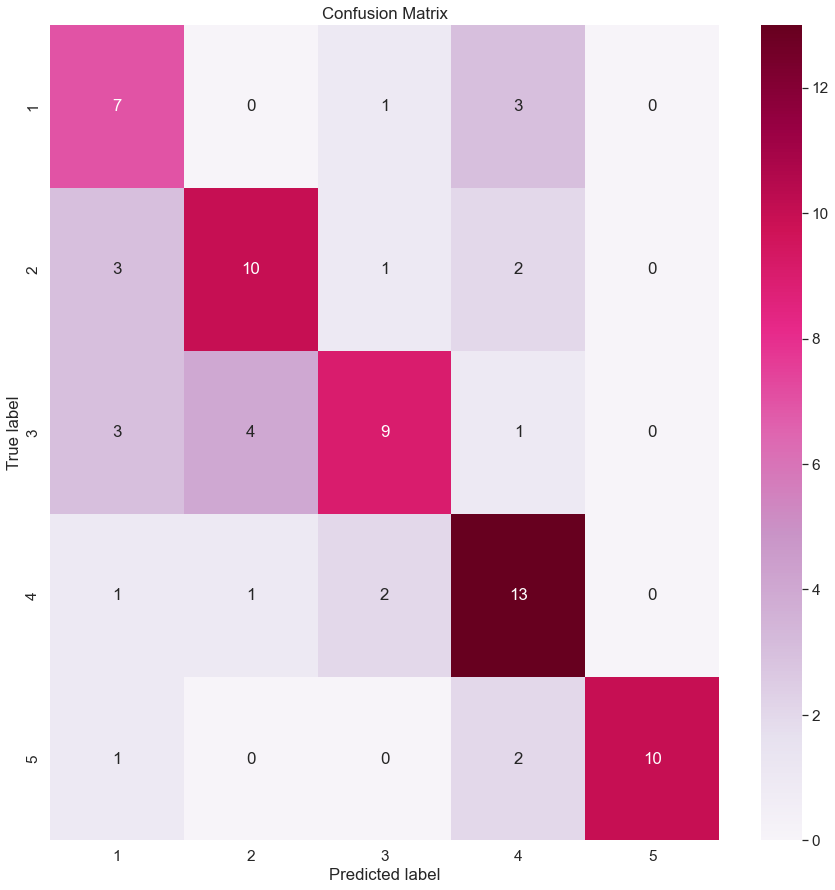

,1,2,3,4,5
1,7,0,1,3,0
2,3,10,1,2,0
3,3,4,9,1,0
4,1,1,2,13,0
5,1,0,0,2,10


In [38]:
# A variable
model_svm.fit(X_train_a, y_train_a)
#predict
pred_svm_a=model_svm.predict(X_test_a)
from sklearn.metrics import classification_report
print(classification_report(y_test_a,pred_svm_a))
plot_confusion(y_test_a, pred_svm_a)

### For variable `D`

              precision    recall  f1-score   support

           1       0.46      0.55      0.50        11
           2       0.30      0.25      0.27        12
           3       0.29      0.44      0.35         9
           4       1.00      0.67      0.80        15
           5       0.89      0.89      0.89        19

    accuracy                           0.61        66
   macro avg       0.59      0.56      0.56        66
weighted avg       0.66      0.61      0.62        66



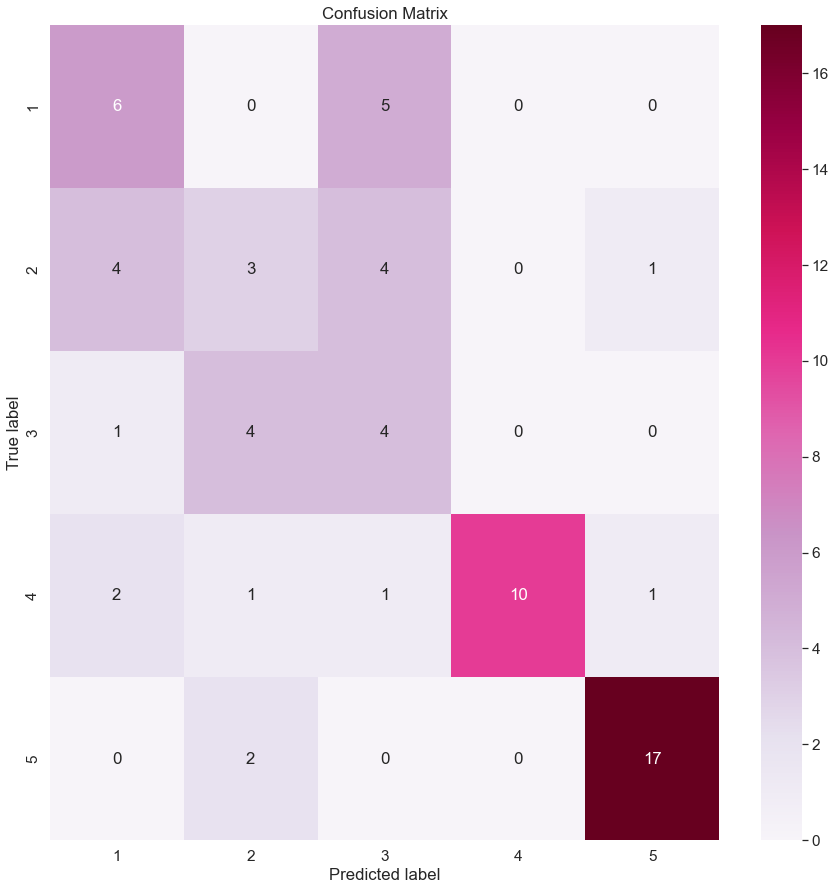

,1,2,3,4,5
1,6,0,5,0,0
2,4,3,4,0,1
3,1,4,4,0,0
4,2,1,1,10,1
5,0,2,0,0,17


In [39]:
# D variable
model_svm.fit(X_train_d, y_train_d)
#predict
pred_svm_d=model_svm.predict(X_test_d)
print(classification_report(y_test_d,pred_svm_d))
plot_confusion(y_test_d, pred_svm_d)

### For variable `S`

              precision    recall  f1-score   support

           1       0.40      0.75      0.52         8
           2       0.50      0.67      0.57         9
           3       0.47      0.64      0.54        11
           4       0.78      0.74      0.76        19
           5       0.86      0.30      0.44        20

    accuracy                           0.58        67
   macro avg       0.60      0.62      0.57        67
weighted avg       0.67      0.58      0.57        67



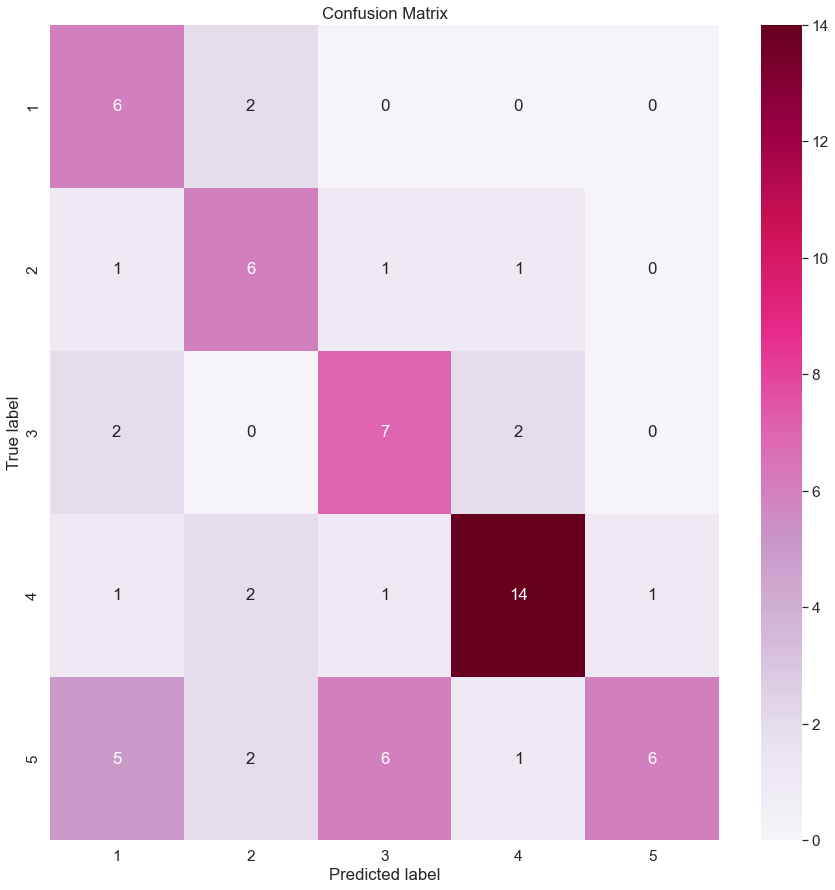

,1,2,3,4,5
1,6,2,0,0,0
2,1,6,1,1,0
3,2,0,7,2,0
4,1,2,1,14,1
5,5,2,6,1,6


In [40]:
# S variable
model_svm.fit(X_train_s, y_train_s)
#predict
pred_svm_s=model_svm.predict(X_test_s)
from sklearn.metrics import classification_report
print(classification_report(y_test_s,pred_svm_s))
plot_confusion(y_test_s, pred_svm_s)

## Random Forest

### For variable `A`

              precision    recall  f1-score   support

           1       0.27      0.36      0.31        11
           2       0.85      0.69      0.76        16
           3       0.75      0.53      0.62        17
           4       0.67      0.82      0.74        17
           5       0.77      0.77      0.77        13

    accuracy                           0.65        74
   macro avg       0.66      0.63      0.64        74
weighted avg       0.68      0.65      0.66        74



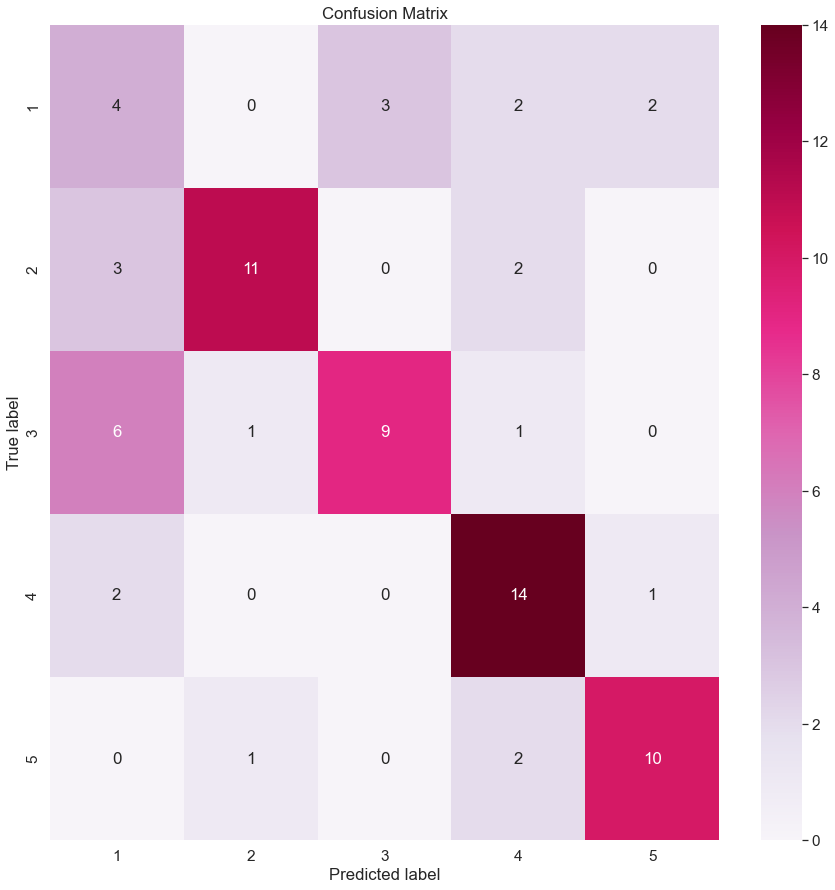

,1,2,3,4,5
1,4,0,3,2,2
2,3,11,0,2,0
3,6,1,9,1,0
4,2,0,0,14,1
5,0,1,0,2,10


In [41]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest= RandomForestClassifier()
# A variable
model_random_forest.fit(X_train_a, y_train_a)
#predict
pred_random_forest_a=model_random_forest.predict(X_test_a)
from sklearn.metrics import classification_report
print(classification_report(y_test_a,pred_random_forest_a))
plot_confusion(y_test_a, pred_random_forest_a)

### For variable `D`

              precision    recall  f1-score   support

           1       0.54      0.64      0.58        11
           2       0.56      0.42      0.48        12
           3       0.60      0.67      0.63         9
           4       0.80      0.80      0.80        15
           5       0.84      0.84      0.84        19

    accuracy                           0.70        66
   macro avg       0.67      0.67      0.67        66
weighted avg       0.70      0.70      0.69        66



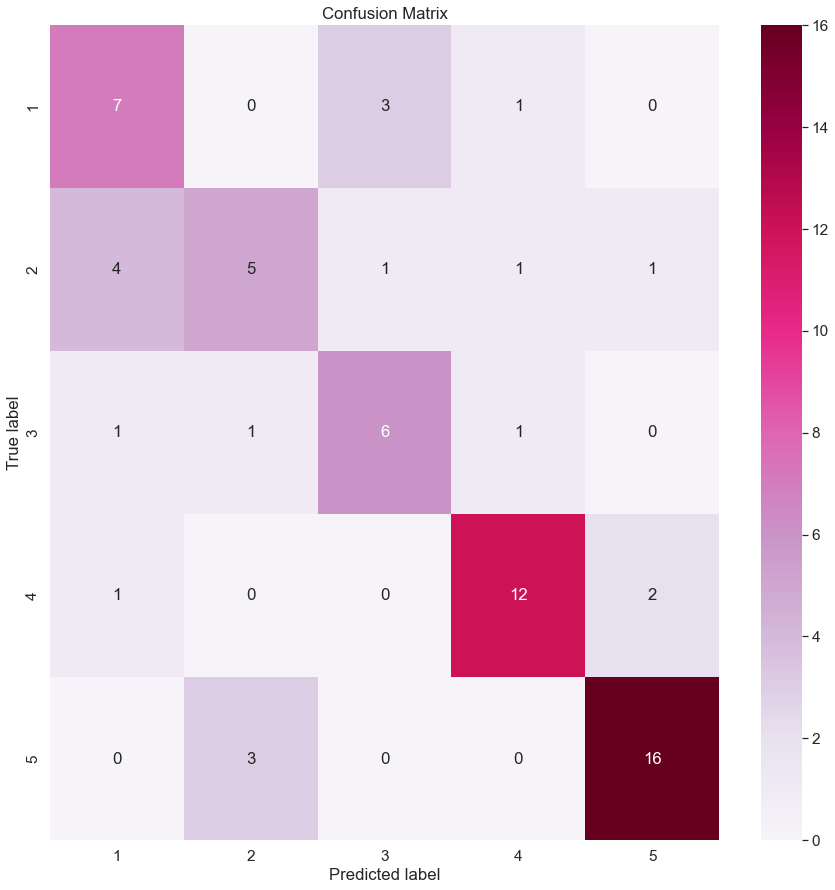

,1,2,3,4,5
1,7,0,3,1,0
2,4,5,1,1,1
3,1,1,6,1,0
4,1,0,0,12,2
5,0,3,0,0,16


In [42]:
# D variable
model_random_forest.fit(X_train_d, y_train_d)
#predict
pred_random_forest_d=model_random_forest.predict(X_test_d)
print(classification_report(y_test_d,pred_random_forest_d))
plot_confusion(y_test_d, pred_random_forest_d)

### For variable `S`

              precision    recall  f1-score   support

           1       0.50      0.88      0.64         8
           2       0.42      0.56      0.48         9
           3       0.55      0.55      0.55        11
           4       0.74      0.74      0.74        19
           5       0.64      0.35      0.45        20

    accuracy                           0.58        67
   macro avg       0.57      0.61      0.57        67
weighted avg       0.60      0.58      0.57        67



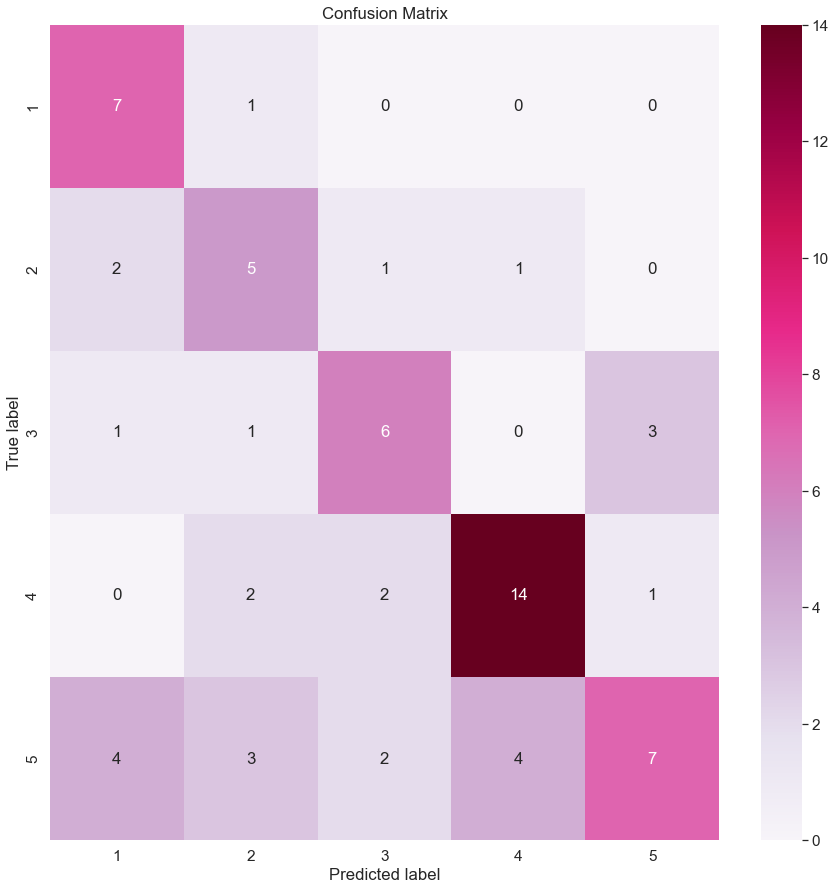

,1,2,3,4,5
1,7,1,0,0,0
2,2,5,1,1,0
3,1,1,6,0,3
4,0,2,2,14,1
5,4,3,2,4,7


In [43]:
# S variable
model_random_forest.fit(X_train_s, y_train_s)
#predict
pred_random_forest_s=model_random_forest.predict(X_test_s)
print(classification_report(y_test_s,pred_random_forest_s))
plot_confusion(y_test_s,pred_random_forest_s)

## XGBOOST

Ultilizing label encoding for categorical data to use with xgboost

In [44]:
!pip install xgboost==0.90

### For variable `A`

              precision    recall  f1-score   support

           1       0.25      0.27      0.26        11
           2       0.69      0.69      0.69        16
           3       0.71      0.59      0.65        17
           4       0.67      0.82      0.74        17
           5       0.82      0.69      0.75        13

    accuracy                           0.64        74
   macro avg       0.63      0.61      0.62        74
weighted avg       0.65      0.64      0.64        74



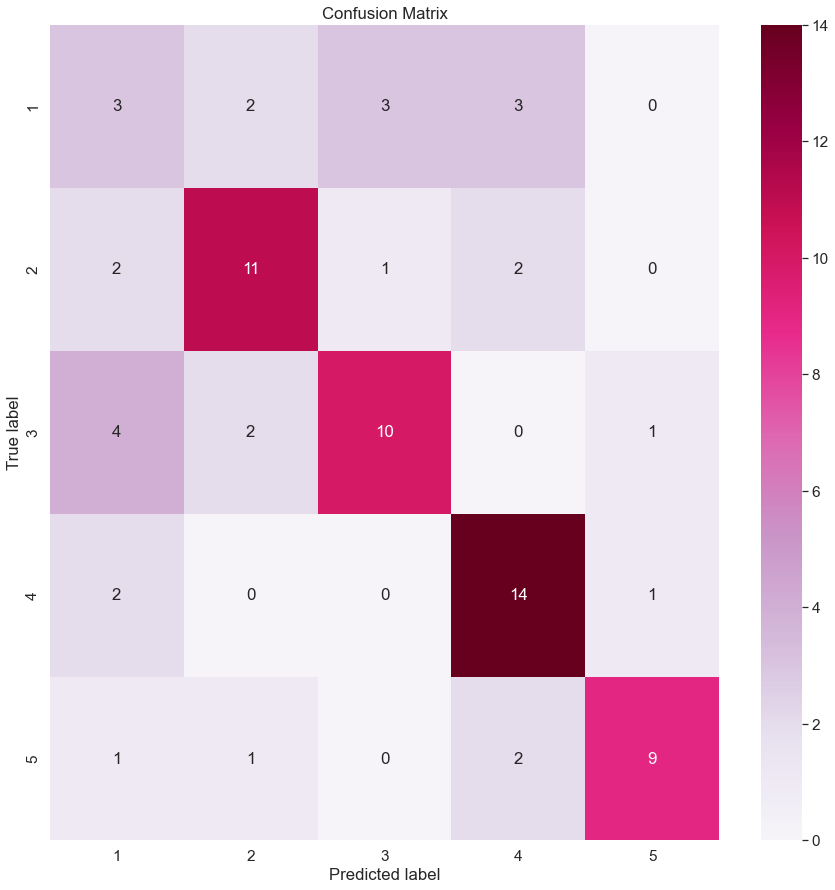

,1,2,3,4,5
1,3,2,3,3,0
2,2,11,1,2,0
3,4,2,10,0,1
4,2,0,0,14,1
5,1,1,0,2,9


In [45]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_a, y_train_a)
pred_xg_a = xgb_cl.predict(X_test_a)
print(classification_report(y_test_a,pred_xg_a))
plot_confusion(y_test_a,pred_xg_a)

### For variable `S`

              precision    recall  f1-score   support

           1       0.70      0.88      0.78         8
           2       0.54      0.78      0.64         9
           3       0.50      0.55      0.52        11
           4       0.67      0.74      0.70        19
           5       0.64      0.35      0.45        20

    accuracy                           0.61        67
   macro avg       0.61      0.66      0.62        67
weighted avg       0.62      0.61      0.60        67



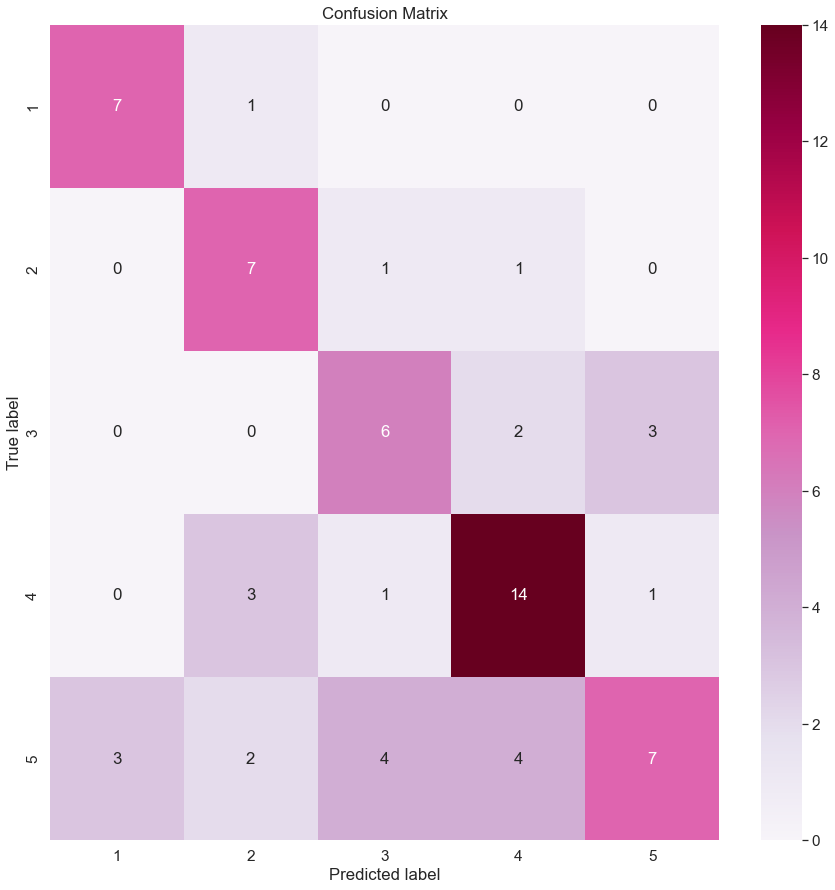

,1,2,3,4,5
1,7,1,0,0,0
2,0,7,1,1,0
3,0,0,6,2,3
4,0,3,1,14,1
5,3,2,4,4,7


In [46]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_s, y_train_s)
pred_xg_s = xgb_cl.predict(X_test_s)
print(classification_report(y_test_s,pred_xg_s))
plot_confusion(y_test_s,pred_xg_s)

### For Variable `D`

              precision    recall  f1-score   support

           1       0.44      0.36      0.40        11
           2       0.46      0.50      0.48        12
           3       0.38      0.56      0.45         9
           4       0.73      0.73      0.73        15
           5       0.88      0.74      0.80        19

    accuracy                           0.61        66
   macro avg       0.58      0.58      0.57        66
weighted avg       0.63      0.61      0.61        66



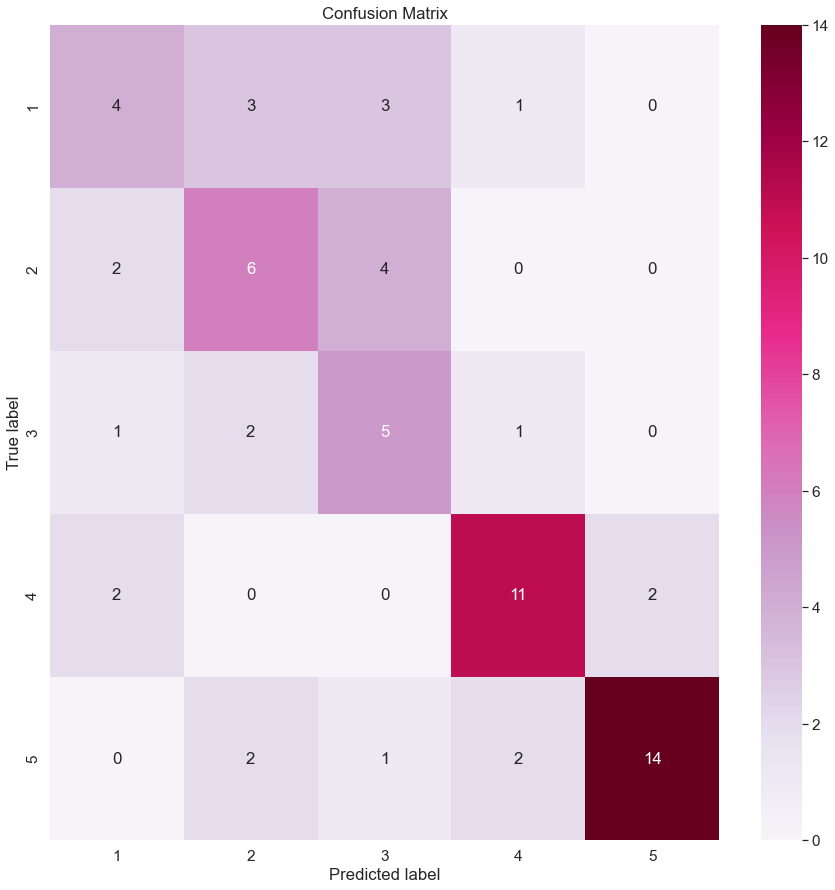

,1,2,3,4,5
1,4,3,3,1,0
2,2,6,4,0,0
3,1,2,5,1,0
4,2,0,0,11,2
5,0,2,1,2,14


In [47]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_d, y_train_d)
pred_xg_d = xgb_cl.predict(X_test_d)
print(classification_report(y_test_d,pred_xg_d))
plot_confusion(y_test_d,pred_xg_d)

## Naive Bayes

### For Variable `A`

              precision    recall  f1-score   support

           1       0.36      0.45      0.40        11
           2       0.56      0.56      0.56        16
           3       0.70      0.41      0.52        17
           4       0.55      0.71      0.62        17
           5       0.75      0.69      0.72        13

    accuracy                           0.57        74
   macro avg       0.58      0.57      0.56        74
weighted avg       0.59      0.57      0.57        74



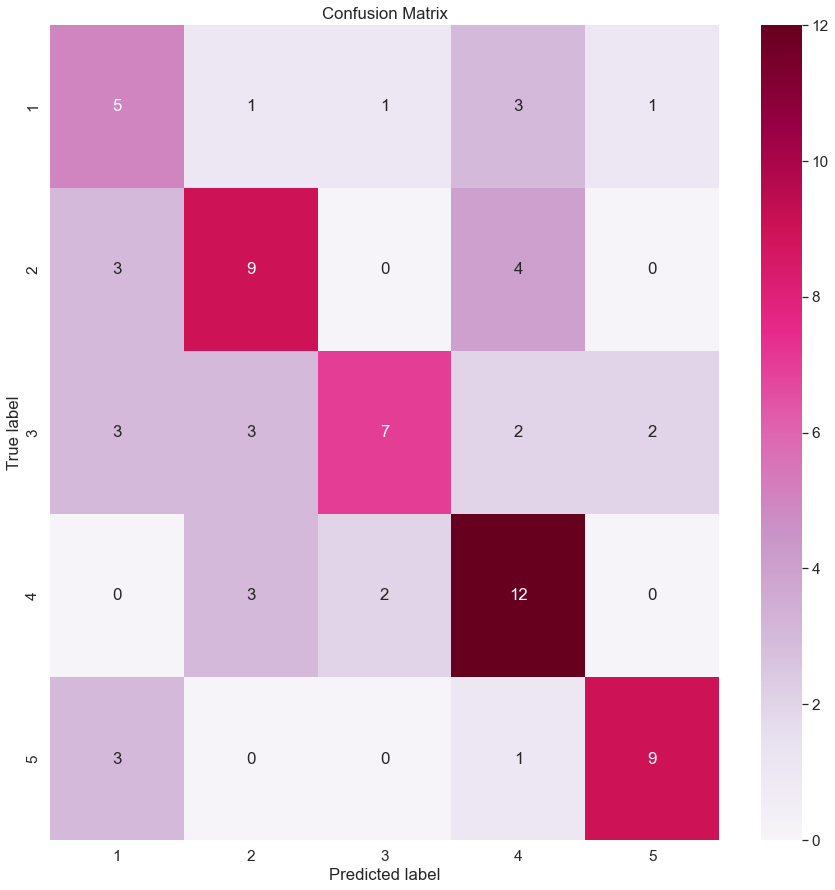

,1,2,3,4,5
1,5,1,1,3,1
2,3,9,0,4,0
3,3,3,7,2,2
4,0,3,2,12,0
5,3,0,0,1,9


In [48]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes= GaussianNB()
# A variable
model_naive_bayes.fit(X_train_a, y_train_a)
#predict
pred_naive_bayes_a=model_naive_bayes.predict(X_test_a)
from sklearn.metrics import classification_report
print(classification_report(y_test_a,pred_naive_bayes_a))
plot_confusion(y_test_a,pred_naive_bayes_a)

### For variable `D`

              precision    recall  f1-score   support

           1       0.40      0.55      0.46        11
           2       0.25      0.25      0.25        12
           3       0.29      0.22      0.25         9
           4       0.75      0.40      0.52        15
           5       0.67      0.84      0.74        19

    accuracy                           0.50        66
   macro avg       0.47      0.45      0.45        66
weighted avg       0.51      0.50      0.49        66



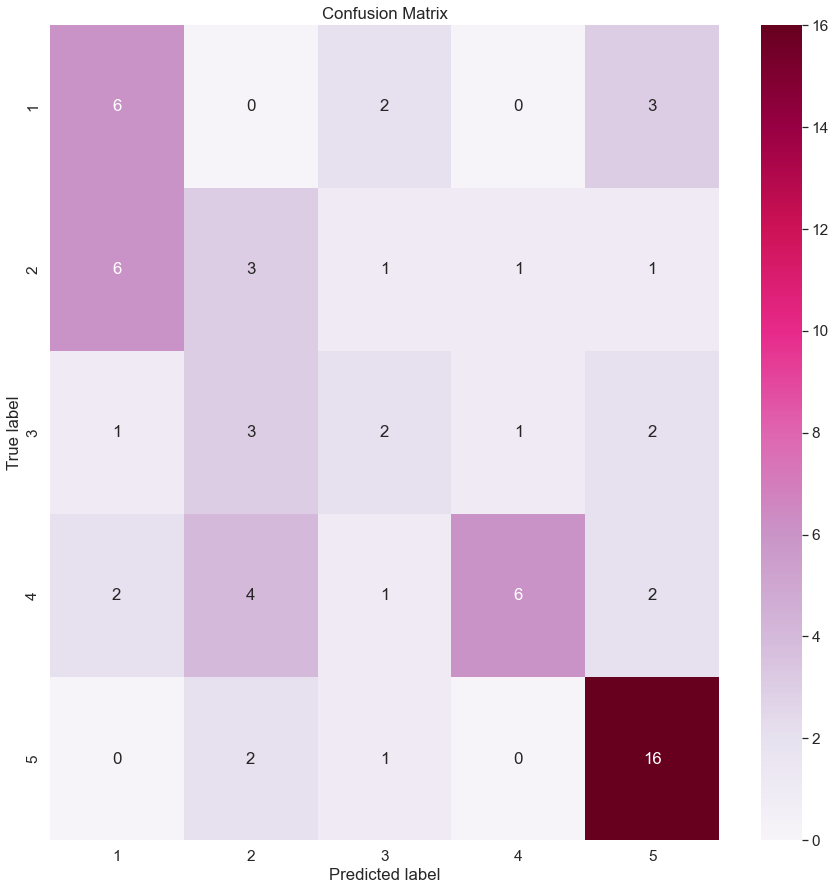

,1,2,3,4,5
1,6,0,2,0,3
2,6,3,1,1,1
3,1,3,2,1,2
4,2,4,1,6,2
5,0,2,1,0,16


In [49]:
# D variable
model_naive_bayes.fit(X_train_d, y_train_d)
#predict
pred_naive_bayes_d=model_naive_bayes.predict(X_test_d)
print(classification_report(y_test_d,pred_naive_bayes_d))
plot_confusion(y_test_d, pred_naive_bayes_d)

In [50]:
# S variable
model_naive_bayes.fit(X_train_s, y_train_s)
#predict
pred_naive_bayes_s=model_naive_bayes.predict(X_test_s)

print(classification_report(y_test_s,pred_naive_bayes_s))

              precision    recall  f1-score   support

           1       0.36      0.62      0.45         8
           2       0.31      0.44      0.36         9
           3       0.42      0.45      0.43        11
           4       0.67      0.53      0.59        19
           5       0.54      0.35      0.42        20

    accuracy                           0.46        67
   macro avg       0.46      0.48      0.45        67
weighted avg       0.50      0.46      0.47        67



## MLP

              precision    recall  f1-score   support

           1       0.46      0.55      0.50        11
           2       0.77      0.62      0.69        16
           3       0.88      0.41      0.56        17
           4       0.52      0.71      0.60        17
           5       0.59      0.77      0.67        13

    accuracy                           0.61        74
   macro avg       0.64      0.61      0.60        74
weighted avg       0.66      0.61      0.61        74



/Users/nhatbuiminh/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


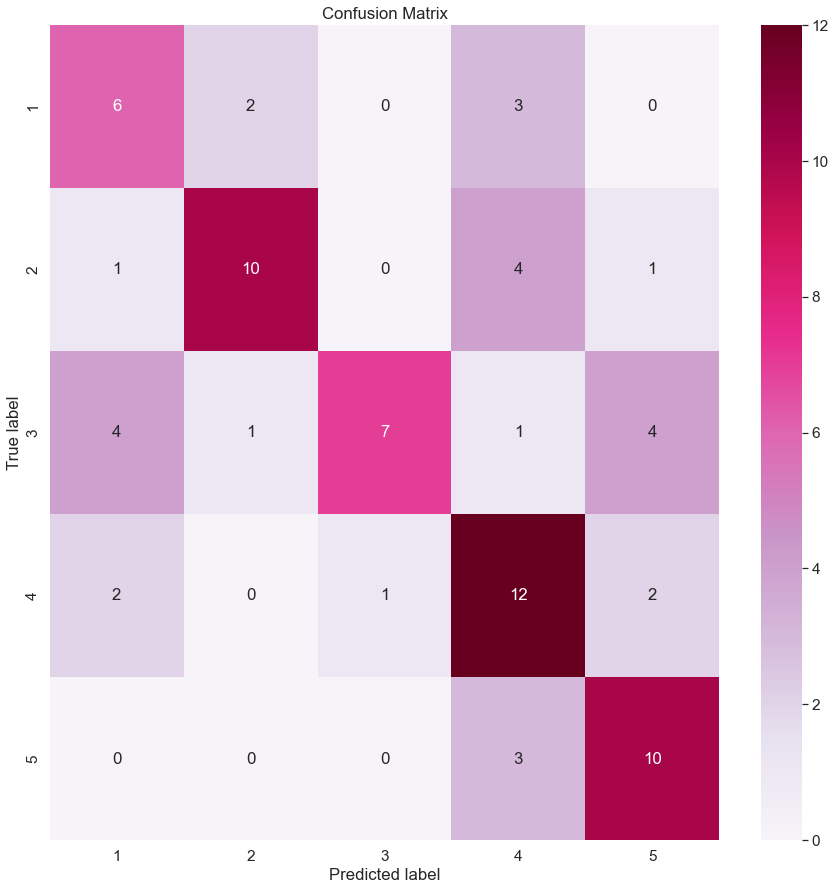

,1,2,3,4,5
1,6,2,0,3,0
2,1,10,0,4,1
3,4,1,7,1,4
4,2,0,1,12,2
5,0,0,0,3,10


In [51]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train_a, y_train_a)
pred_mlp_a = mlp.predict(X_test_a)
print(classification_report(y_test_a,pred_mlp_a))
plot_confusion(y_test_a,pred_mlp_a)

### For variable `D`

/Users/nhatbuiminh/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.31      0.36      0.33        11
           2       0.30      0.25      0.27        12
           3       0.18      0.22      0.20         9
           4       0.65      0.73      0.69        15
           5       0.80      0.63      0.71        19

    accuracy                           0.48        66
   macro avg       0.45      0.44      0.44        66
weighted avg       0.51      0.48      0.49        66



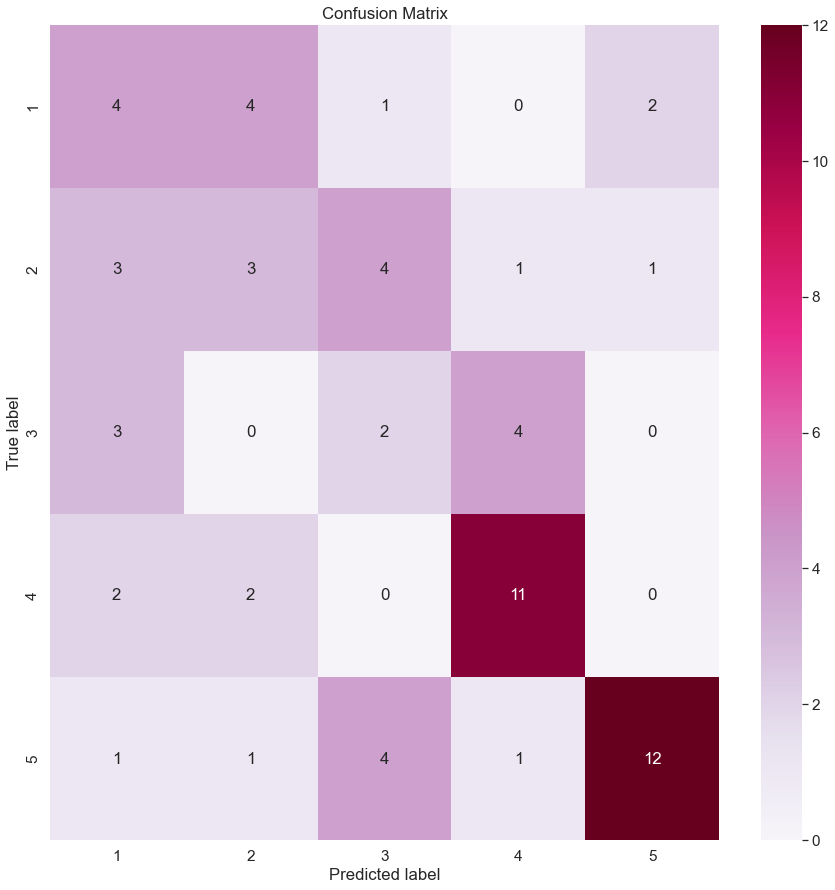

,1,2,3,4,5
1,4,4,1,0,2
2,3,3,4,1,1
3,3,0,2,4,0
4,2,2,0,11,0
5,1,1,4,1,12


In [52]:
mlp.fit(X_train_d, y_train_d)
pred_mlp_d = mlp.predict(X_test_d)
print(classification_report(y_test_d,pred_mlp_d))
plot_confusion(y_test_d,pred_mlp_d)

### For variable `S`

              precision    recall  f1-score   support

           1       0.56      0.62      0.59         8
           2       0.56      0.56      0.56         9
           3       0.45      0.45      0.45        11
           4       0.67      0.63      0.65        19
           5       0.50      0.50      0.50        20

    accuracy                           0.55        67
   macro avg       0.55      0.55      0.55        67
weighted avg       0.55      0.55      0.55        67



/Users/nhatbuiminh/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


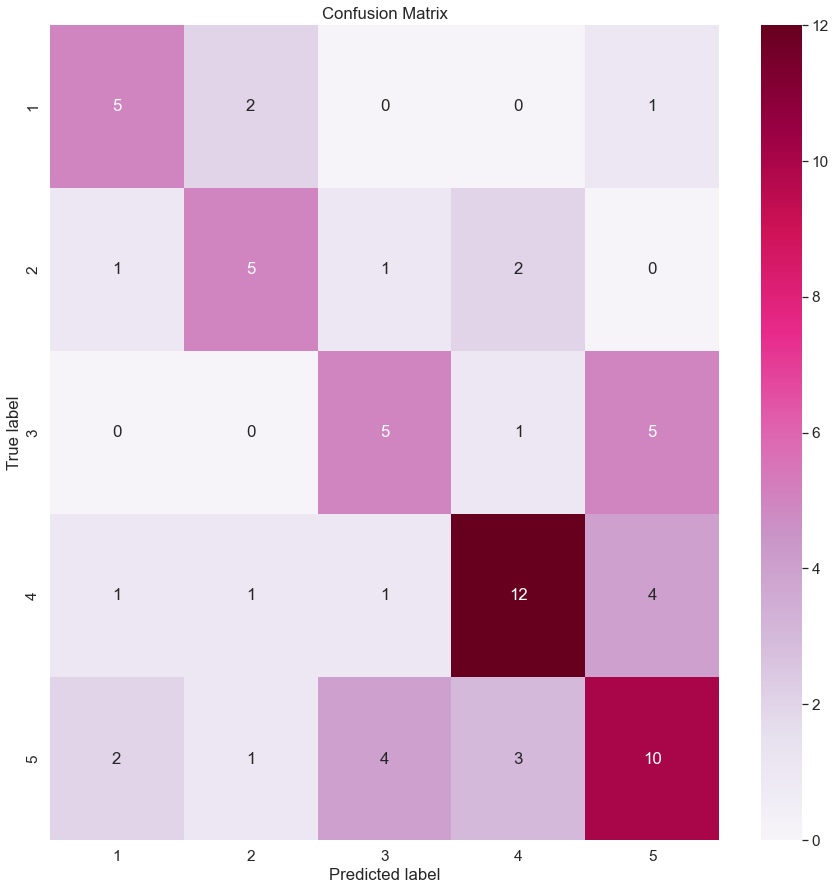

,1,2,3,4,5
1,5,2,0,0,1
2,1,5,1,2,0
3,0,0,5,1,5
4,1,1,1,12,4
5,2,1,4,3,10


In [53]:
mlp.fit(X_train_s, y_train_s)
pred_mlp_s = mlp.predict(X_test_s)
print(classification_report(y_test_s,pred_mlp_s))
plot_confusion(y_test_s,pred_mlp_s)

## Final Judgement

Constructing data frame for variable

### For variable `D`

In [55]:
# initialize list of lists (including models' names, accuracy scores and f1 scores)
D_data = [['Random Forest', metrics.accuracy_score(y_test_d, pred_random_forest_d), metrics.f1_score(y_test_d, pred_random_forest_d, average='weighted')],
          ['Naive Bayes', metrics.accuracy_score(y_test_d, pred_naive_bayes_d), metrics.f1_score(
              y_test_d, pred_naive_bayes_d, average='weighted')],
          ['Logistic Regression', metrics.accuracy_score(y_test_d, pred_logistic_d), metrics.f1_score(
              y_test_d, pred_logistic_d, average='weighted')],
          ['SVM', metrics.accuracy_score(y_test_d, pred_svm_d), metrics.f1_score(
              y_test_d, pred_svm_d, average='weighted')],
          ['XG_BOOST', metrics.accuracy_score(y_test_d, pred_xg_d), metrics.f1_score(
              y_test_d, pred_xg_d, average='weighted')],
          ['MLP', metrics.accuracy_score(y_test_d, pred_mlp_d), metrics.f1_score(
              y_test_d, pred_mlp_d, average='weighted')],
          ['KNN', metrics.accuracy_score(y_test_d, pred_knn_d), metrics.f1_score(y_test_d, pred_knn_d, average='weighted')]]
D_data = pd.DataFrame(D_data, columns=['Model', 'Accuracy', 'F1'])
print(D_data)


                 Model  Accuracy        F1
0        Random Forest  0.696970  0.694169
1          Naive Bayes  0.500000  0.489281
2  Logistic Regression  0.530303  0.522333
3                  SVM  0.606061  0.619745
4             XG_BOOST  0.606061  0.612893
5                  MLP  0.484848  0.491874
6                  KNN  0.545455  0.562602


### For variable `S`

In [56]:
# initialize list of lists (including models' names, accuracy scores and f1 scores)
S_data = [['Random Forest', metrics.accuracy_score(y_test_s, pred_random_forest_s), metrics.f1_score(y_test_s, pred_random_forest_s, average='weighted')],
          ['Naive Bayes', metrics.accuracy_score(y_test_s, pred_naive_bayes_s), metrics.f1_score(
              y_test_s, pred_naive_bayes_s, average='weighted')],
          ['Logistic Regression', metrics.accuracy_score(y_test_s, pred_logistic_s), metrics.f1_score(
              y_test_s, pred_logistic_s, average='weighted')],
          ['SVM', metrics.accuracy_score(y_test_s, pred_svm_s), metrics.f1_score(
              y_test_s, pred_svm_s, average='weighted')],
          ['XG_BOOST', metrics.accuracy_score(y_test_s, pred_xg_s), metrics.f1_score(
              y_test_s, pred_xg_s, average='weighted')],
           ['MLP',metrics.accuracy_score(y_test_s, pred_mlp_s),metrics.f1_score(y_test_s, pred_mlp_s, average='weighted')],
          ['KNN', metrics.accuracy_score(y_test_s, pred_knn_s), metrics.f1_score(y_test_s, pred_knn_s, average='weighted')]]
S_data = pd.DataFrame(S_data, columns=['Model', 'Accuracy', 'F1'])
print(S_data)

                 Model  Accuracy        F1
0        Random Forest  0.582090  0.573267
1          Naive Bayes  0.462687  0.467956
2  Logistic Regression  0.507463  0.496509
3                  SVM  0.582090  0.574733
4             XG_BOOST  0.611940  0.597327
5                  MLP  0.552239  0.552690
6                  KNN  0.552239  0.508591


### For variable `A`

In [57]:
# initialize list of lists (including models' names, accuracy scores and f1 scores)
A_data = [['Random Forest', metrics.accuracy_score(y_test_a, pred_random_forest_a), metrics.f1_score(y_test_a, pred_random_forest_a, average='weighted')],
          ['Naive Bayes', metrics.accuracy_score(y_test_a, pred_naive_bayes_a), metrics.f1_score(
              y_test_a, pred_naive_bayes_a, average='weighted')],
          ['SVM', metrics.accuracy_score(y_test_a, pred_svm_a), metrics.f1_score(
              y_test_a, pred_svm_a, average='weighted')],
          ['XG_BOOST', metrics.accuracy_score(y_test_a, pred_xg_a), metrics.f1_score(
              y_test_a, pred_xg_a, average='weighted')],
          ['MLP', metrics.accuracy_score(y_test_a, pred_mlp_a), metrics.f1_score(
              y_test_a, pred_mlp_a, average='weighted')],
          ['KNN', metrics.accuracy_score(y_test_a, pred_knn_a), metrics.f1_score(y_test_a, pred_knn_a, average='weighted')]]
A_data = pd.DataFrame(A_data, columns=['Model', 'Accuracy', 'F1'])

print(A_data)


           Model  Accuracy        F1
0  Random Forest  0.648649  0.656765
1    Naive Bayes  0.567568  0.568059
2            SVM  0.662162  0.667319
3       XG_BOOST  0.635135  0.636671
4            MLP  0.608108  0.607043
5            KNN  0.581081  0.574855


### Evaluation Result : `F1` and `Accuracy` score

### For individual variable

#### D variable

<Figure size 720x720 with 0 Axes>

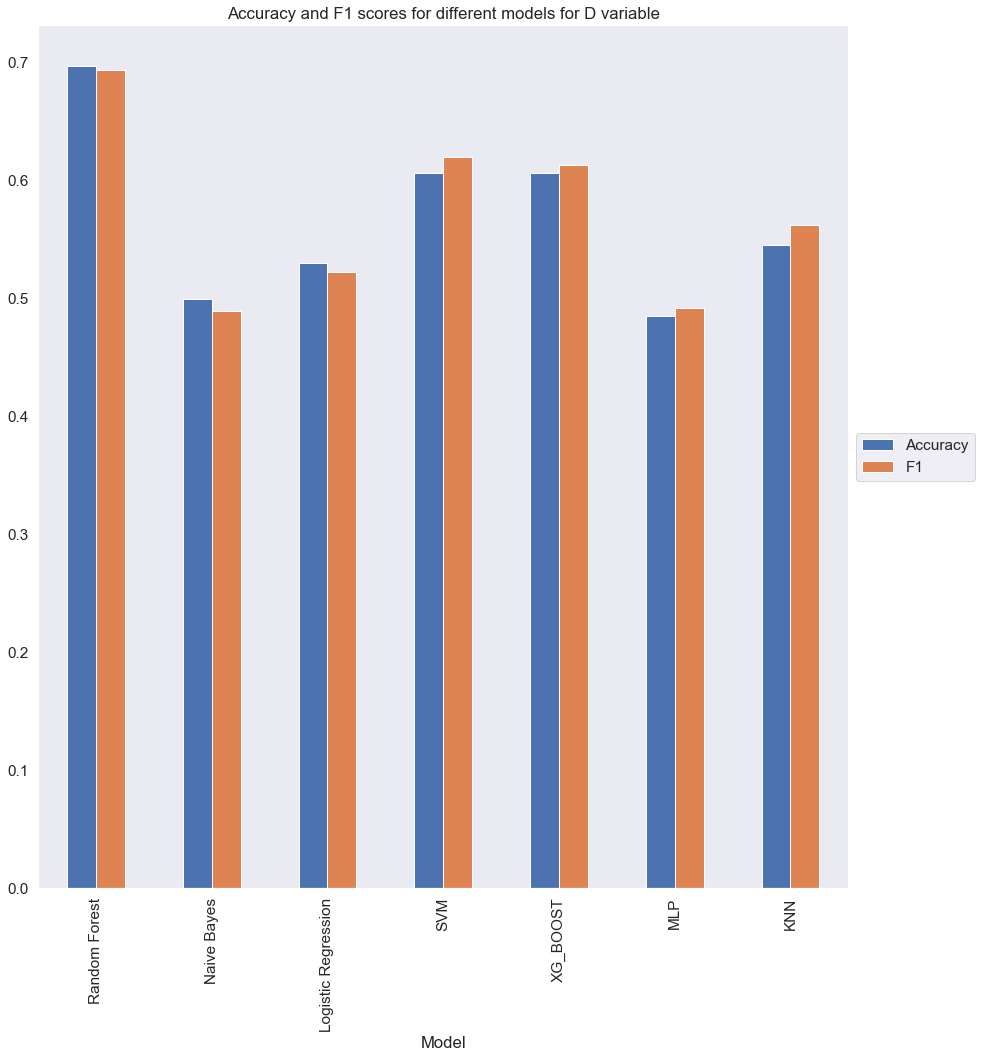

In [58]:
plt.figure(figsize=(10,10))
D_accuracy = D_data.plot.bar(x='Model',y=['Accuracy','F1'],rot=90)
plt.title("Accuracy and F1 scores for different models for D variable")
plt.tight_layout()
plt.grid()
box = D_accuracy.get_position()
D_accuracy.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#### S variable

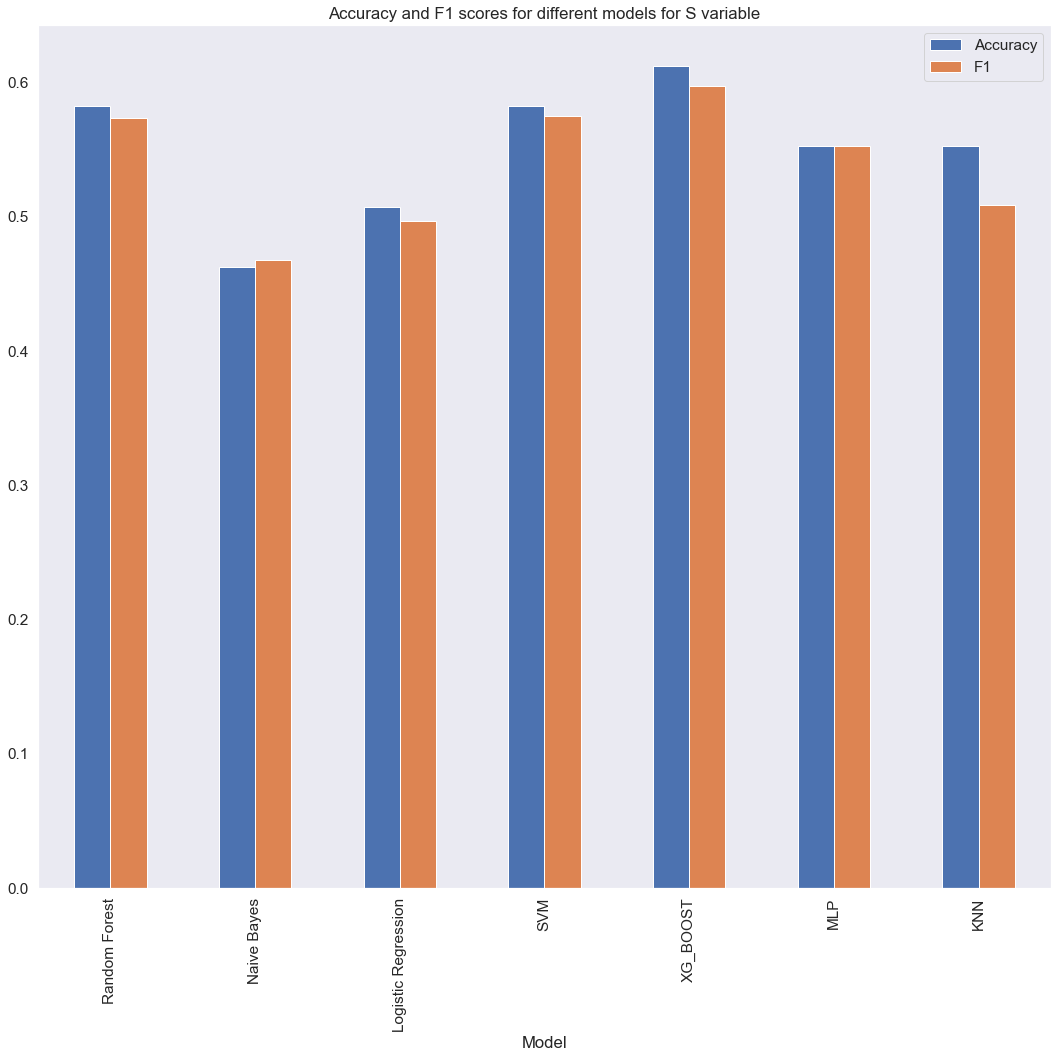

In [59]:
S_accuracy = S_data.plot.bar(x='Model',y=['Accuracy','F1'],rot=90)
plt.title("Accuracy and F1 scores for different models for S variable")
plt.tight_layout()
plt.grid()

#### A variable

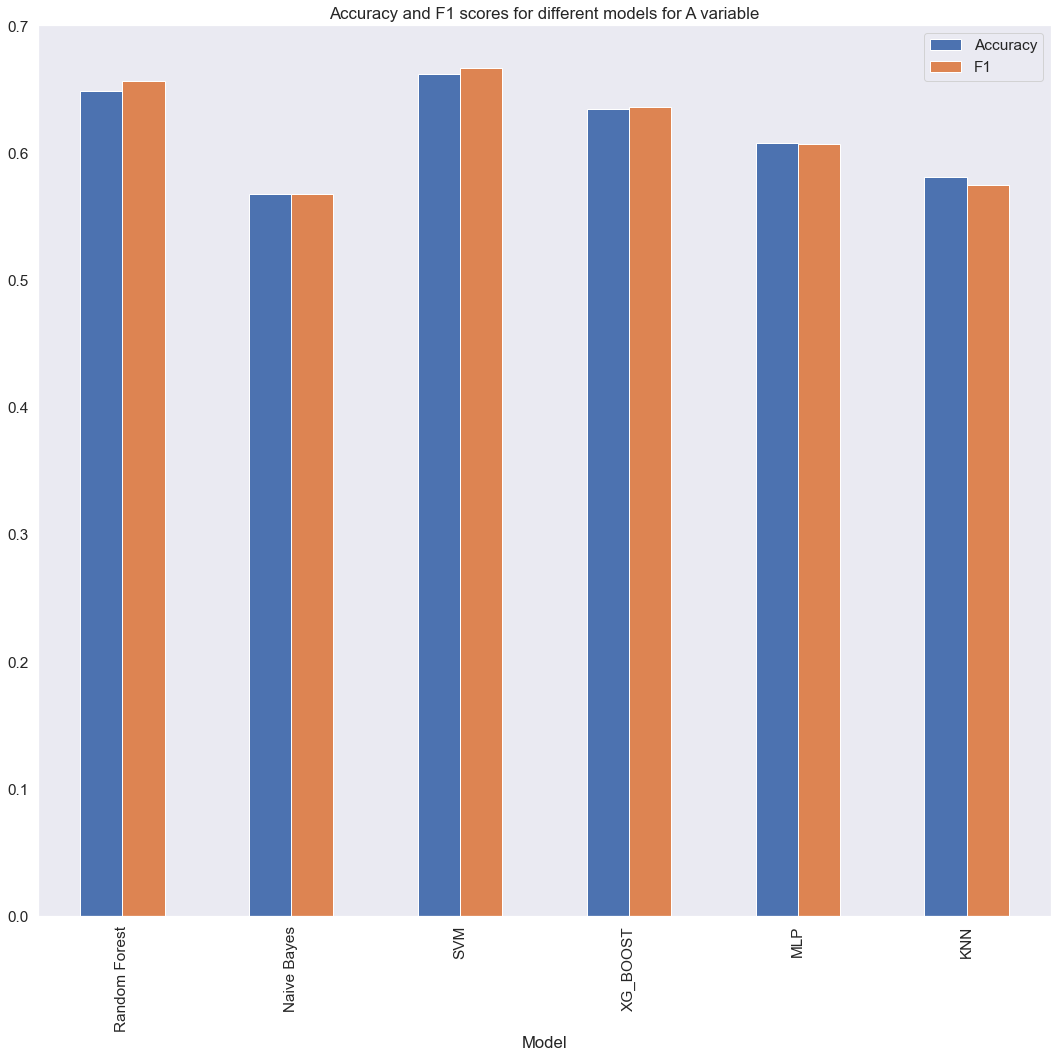

In [60]:
A_accuracy = A_data.plot.bar(x='Model',y=['Accuracy','F1'],rot=90)
plt.title("Accuracy and F1 scores for different models for A variable")
plt.tight_layout()
box = S_accuracy.get_position()
S_accuracy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.grid()

### Average bar chart

Text(0.5, 1.0, 'Accuracy and F1 scores for different models')

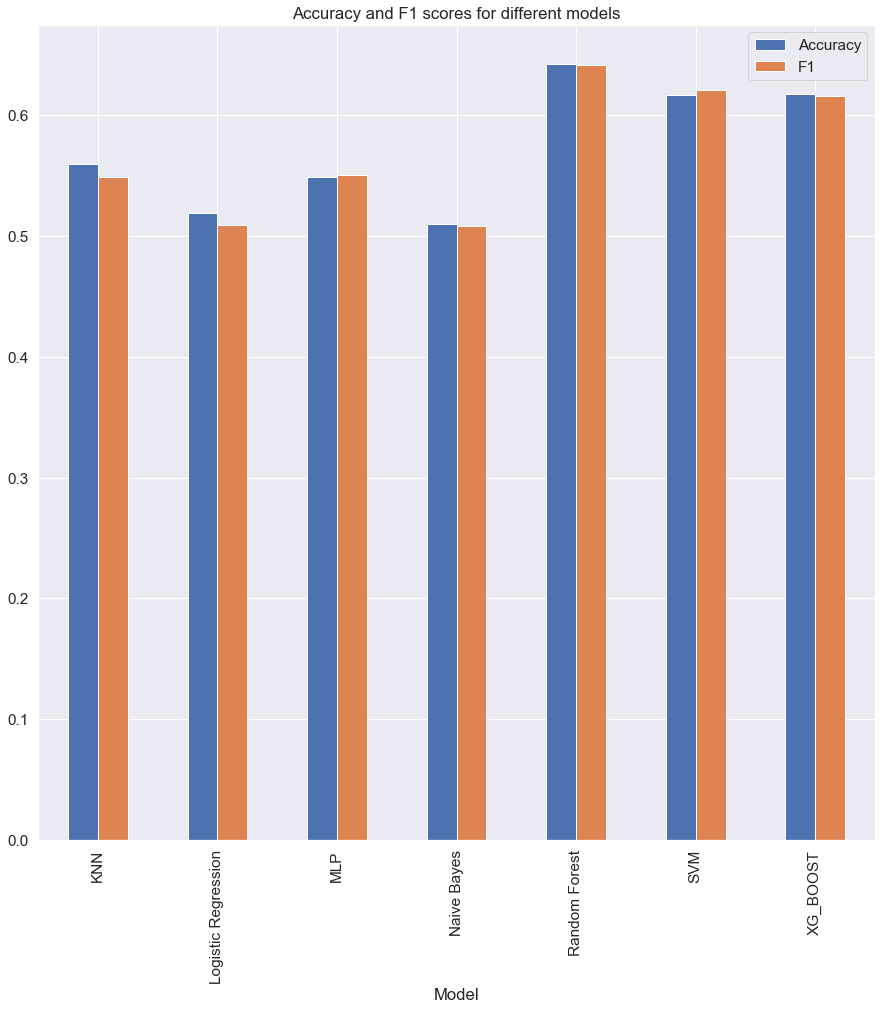

In [61]:
#Merge all D,S,A data in one dataframe
avg_data=pd.concat([D_data,S_data,A_data], axis=0, join='inner')
#Group by model to remove duplicate models' names
avg_data = avg_data.groupby(avg_data['Model']).agg('mean')

# #Demonstratte bar chart
accuracy_chart = avg_data.plot.bar(y=['Accuracy','F1'],rot=90)
plt.title("Accuracy and F1 scores for different models")

As can observe, the average F1 score is higher than the average accuracy score. Furthermore, it show that the Random Forest model performt the best amongst other model 

## Hyperparameter tuning for Random Forest

https://conference.scipy.org/proceedings/scipy2014/pdfs/komer.pdf

In [62]:
## Adopting hyper opt
!pip install hyperopt
!pip install git+https://github.com/hyperopt/hyperopt-sklearn 

  Cloning https://github.com/hyperopt/hyperopt-sklearn to /private/var/folders/rv/7z1l4p8j1mq8sjr5hxfz73q00000gn/T/pip-req-build-jbe4enkk
  Running command git clone --filter=blob:none --quiet https://github.com/hyperopt/hyperopt-sklearn /private/var/folders/rv/7z1l4p8j1mq8sjr5hxfz73q00000gn/T/pip-req-build-jbe4enkk
  Resolved https://github.com/hyperopt/hyperopt-sklearn to commit 1cce406bedbc9947d19792cd79975d15e391dded
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [63]:
!pip install scikit-optimize

In [64]:
from hpsklearn import HyperoptEstimator, random_forest_classifier
# from hpsklearn import random_forest
from hpsklearn import any_preprocessing, any_classifier
from hyperopt import tpe,hp,Trials, STATUS_OK
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [65]:
model = HyperoptEstimator(
    classifier=random_forest_classifier('cla')
    , preprocessing=any_preprocessing('pre')
    , algo=tpe.suggest
    , max_evals=70
) 

In [67]:
# perform the search
model.fit(X_train_d, y_train_d)

 89%|████████▉ | 8/9 [00:00<?, ?trial/s, best loss=?]

In [ ]:
acc = model.score(X_test_d, y_test_d)
print("Accuracy: %.3f" % acc)

In [ ]:

# summarize the best model
print(model.best_model())

Adopting param grid space from https://ieeexplore-ieee-org.ezproxy.lib.rmit.edu.au/abstract/document/7965867/figures#figures
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

## For `S` Variable

Use grid search to find the best hyperparameter for the Random Forest model

In [ ]:
model.fit(X_train_s, y_train_s)

In [ ]:
acc = model.score(X_test_s, y_test_s)
print("Accuracy: %.3f" % acc)

In [ ]:
print(model.best_model())

### For `A` Variable

In [ ]:
model.fit(X_train_a, y_train_a)

In [ ]:
acc = model.score(X_test_a, y_test_a)
print("Accuracy: %.3f" % acc)
print(model.best_model())

# Hyperparameter tuning using Optuna

Reference :https://www.kaggle.com/general/271613 
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
<br>
https://www.analyticsvidhya.com/blog/2020/11/hyperparameter-tuning-using-optuna/

After discovering that the Random Forest model performance will be increase if using data preprocessor, we decided to tune the model using pipeline inconjuction with the preprocessor from sklearn and the Random Forest model

In [ ]:
!pip install optuna

In [ ]:
X_train_d

In [ ]:
y_train_d

In [ ]:
import optuna
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#Set the number of trial 
no_trial = 1500


def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 150),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    }
    
    # -- Instantiate scaler
    # (a) List scalers to chose from
    scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust'])

    # (b) Define your scalers
    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    else:
        scaler = RobustScaler()

    # -- Instantiate dimensionality reduction
     # (a) List all dimensionality reduction options
    dim_red = trial.suggest_categorical("dim_red", ["PCA", None])

    # (b) Define the PCA algorithm and its hyperparameters
    if dim_red == "PCA":
        pca_n_components=trial.suggest_int("pca_n_components", 2, 30) # suggest an integer from 2 to 30
        dimen_red_algorithm=PCA(n_components=pca_n_components)
    # (c) No dimensionality reduction option
    else:
        dimen_red_algorithm='passthrough'
    
    clf = RandomForestClassifier(**params)
    pipeline = make_pipeline(scaler, dimen_red_algorithm, clf)
    cv = StratifiedKFold(n_splits=5, random_state= 42, shuffle=True)
    return cross_val_score(pipeline, X_train_d, y_train_d, n_jobs=-1, cv=cv, scoring = 'f1_weighted').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=no_trial)

In [ ]:
trial = study.best_trial

print('F1 score: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_edf(study)

In [ ]:
viz = optuna.visualization.plot_contour(study, params=['n_estimators', 'min_samples_leaf','min_samples_split'])
viz.show()
type(viz)

In [ ]:
optuna.visualization.plot_slice(study, params=["n_estimators", "max_depth", "min_samples_leaf","min_samples_split"])

In [ ]:
model_a = build_and_test_model(X_train_d, y_train_d, X_test_d, y_test_d,trial)

## For S variable

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 100),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 150),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    }
    # -- Instantiate scaler
    # (a) List scalers to chose from
    scalers = trial.suggest_categorical("scalers", ['minmax', 'standard', 'robust'])

    # (b) Define your scalers
    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    else:
        scaler = RobustScaler()

    # -- Instantiate dimensionality reduction
     # (a) List all dimensionality reduction options
    dim_red = trial.suggest_categorical("dim_red", ["PCA", None])

    # (b) Define the PCA algorithm and its hyperparameters
    if dim_red == "PCA":
        pca_n_components=trial.suggest_int("pca_n_components", 2, 30) # suggest an integer from 2 to 30
        dimen_red_algorithm=PCA(n_components=pca_n_components)
    # (c) No dimensionality reduction option
    else:
        dimen_red_algorithm='passthrough'
        
    
    clf = RandomForestClassifier(**params)
    pipeline = make_pipeline(scaler, dimen_red_algorithm, clf)
    cv = StratifiedKFold(n_splits=5, random_state= 42, shuffle=True)
    return cross_val_score(pipeline, X_train_s, y_train_s, n_jobs=-1, cv=cv, scoring = 'f1_weighted').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=no_trial)
trial = study.best_trial
print('F1 score: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study, params=["n_estimators", "max_depth", "min_samples_leaf","min_samples_split"])

In [ ]:
model_s = build_and_test_model(X_train_s, y_train_s, X_test_s, y_test_s)

## For `A` Variable

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 2, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 100),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 150),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    }

  # -- Instantiate scaler
    # (a) List scalers to chose from
    scalers = trial.suggest_categorical(
        "scalers", ['minmax', 'standard', 'robust'])

    # (b) Define your scalers
    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    else:
        scaler = RobustScaler()

    # -- Instantiate dimensionality reduction
     # (a) List all dimensionality reduction options
    dim_red = trial.suggest_categorical("dim_red", ["PCA", None])

    # (b) Define the PCA algorithm and its hyperparameters
    if dim_red == "PCA":
        pca_n_components = trial.suggest_int(
            "pca_n_components", 2, 30)  # suggest an integer from 2 to 30
        dimen_red_algorithm = PCA(n_components=pca_n_components)
    # (c) No dimensionality reduction option
    else:
        dimen_red_algorithm = 'passthrough'

    clf = RandomForestClassifier(**params)
    pipeline = make_pipeline(scaler, dimen_red_algorithm, clf)
    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    return cross_val_score(pipeline, X_train_a, y_train_a, n_jobs=-1, cv=cv, scoring='f1_weighted').mean()


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=no_trial)
trial = study.best_trial
print('F1 score: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study, params=["n_estimators", "max_depth", "min_samples_leaf","min_samples_split"])

In [ ]:
len(X_train_a)

In [ ]:
model_a = build_and_test_model(X_train_a, y_train_a, X_test_a, y_test_a, trial)